# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '../..')

import matplotlib.pyplot as plt

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\scratch\..\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\scratch\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-08-27 15:35:32
Current date and time (UTC):   2025-08-27 18:35:32

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2023-05-15
model = gpt-4.1-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 32000
timeout = 480
max_attempts = 5
waiting_time = 1
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = openai_api_cache.pickle
max_cont

2025-08-27 15:36:01,689 - tinytroupe - DEBUG - Initializing OpenAIClient
2025-08-27 15:36:01,692 - tinytroupe - DEBUG - Initializing AzureClient
2025-08-27 15:36:01,694 - tinytroupe - DEBUG - Initializing OpenAIClient
2025-08-27 15:36:01,696 - tinytroupe - DEBUG - Initializing OllamaClient
2025-08-27 15:36:01,698 - tinytroupe - DEBUG - base_url set to None


## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

2025-08-27 15:36:48,977 - tinytroupe - DEBUG - -----------------------------------------> Transaction: change_context with args ('Your TV broke and you need a new one. You search for a new TV on Bing.',) and kwargs {} under simulation None, parallel=False.
2025-08-27 15:36:48,982 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'context': 'Your TV broke and you need a new one. You search for a new TV on Bing.'} under simulation None, parallel=False.
2025-08-27 15:36:48,983 - tinytroupe - DEBUG - [Lisa Carter] Retrieving relevant memories for contextual target: Current Context: Your TV broke and you need a new one. You search for a new TV on Bing.
Current Goals: []
Current Attention: None
Current Emotions: Feeling nothing in particular, just calm.
Selected Episodic Memories (from oldest to newest):
  - Internal memory mechanism note: there were other memories here, but they were omitted for brevity.
2025-08-2

In [8]:
lisa.listen_and_act(eval_request_msg)

2025-08-27 15:36:51,643 - tinytroupe - DEBUG - -----------------------------------------> Transaction: listen_and_act with args ('\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\n\n# AD 1\n```\n\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\nhttps://www.lg.com/tv/oled\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.\n\nInfinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote\n\nExclusive Gaming Features\nLG G2 97" OLED evo TV\nFree Gaming Stand w/ Purchase\nWorld\'s No.1 OLED TV\n\n```\n\n# AD 2\n```\n\nThe Perfect Family TV - Samsung 4K & 8K TVs\nhttps://www.samsung.com\nAdBring Your Family Together with Samsung\'s 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K TVs
          > Samsung Financing Ranked #1 By The ACSI®  Perfect for Family Movie Nights  ```  # AD 3
          > ```  Affordable 55 Inch TV - Wayfair Deals Shop Now
          > https://www.wayfair.com/furniture/free-shipping AdGet the Best Deals on 55 Inch TVs at
          > Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over
          > $35.  Affordable Prices · Great Deals · Free Shipping  ```

2025-08-27 15:36:51,683 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:36:51,684 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:36:51,686 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': False, 'max_content_length': None, 'communication_display': None} under simulation None, parallel=False.
2025-08-27 15:36:51,691 - tinytroupe - DEBUG - [Lisa Carter] Sending messages to OpenAI API
2025-08-27 15:36:51,692 - tinytroupe - DEBUG - [Lisa Carter] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultim

Lisa Carter acts: [THINK] 
                 > I need to evaluate the three ads and decide which convinces me more to buy based
                 > on my financial situation, background, and personality. Given my role as a data
                 > scientist working on AI and search relevance, I value clear, tech-informed
                 > communication and practical benefits. I'm not a gamer myself but appreciate high-
                 > tech features. Financially, I'm a professional but cautious with spending — I
                 > prefer quality but not unnecessary extravagance. The first ad targets gamers with
                 > high-end features which don't align with my interests. The second ad focuses on
                 > family-friendly features and financing, which is appealing as it's practical. The
                 > third focuses on budget-friendly pricing and free shipping, which is attractive
                 > for saving money but might compromise on quality. Considering my preference for
                 > balance, I think the second ad convinces me the most because it balances quality,
                 > family use, and financial accessibility via financing.

2025-08-27 15:37:04,878 - tinytroupe - DEBUG - [Lisa Carter] Current episode event count: 3.
2025-08-27 15:37:04,880 - tinytroupe - DEBUG - [Lisa Carter] Cognitive state: {'goals': 'Respond accurately and helpfully to the request evaluating ads with a clear explanation reflecting my persona.', 'context': ["Currently evaluating three different TV ads based on their appeal to my persona's background and preferences."], 'attention': 'Focused on analyzing advertising content with consideration of personal financial prudence and product relevance.', 'emotions': 'Calm and analytical, motivated to provide a thoughtful, clear evaluation.'}
2025-08-27 15:37:04,881 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond accurately and helpfully to the request evaluating ads with a clear explanation reflecting my persona.', 'context': ["Currently evaluating three different TV ads based on their appeal to my 

Lisa Carter acts: [TALK] 
                 > I find the Samsung 'The Perfect Family TV' ad the most convincing. It highlights
                 > stunning picture quality and family-friendly features, which suits my lifestyle
                 > better than the high-end gaming TV. The mention of 48-month 0% APR financing is
                 > practical and makes the purchase more manageable financially. As I tend to weigh
                 > quality with budget and usability, this ad matches my preferences and situation
                 > best.

2025-08-27 15:37:04,896 - tinytroupe - DEBUG - [Lisa Carter] Current episode event count: 4.
2025-08-27 15:37:04,898 - tinytroupe - DEBUG - [Lisa Carter] Cognitive state: {'goals': 'Respond accurately and helpfully to the request evaluating ads with a clear explanation reflecting my persona.', 'context': ["Currently evaluating three different TV ads based on their appeal to my persona's background and preferences."], 'attention': 'Focused on analyzing advertising content with consideration of personal financial prudence and product relevance.', 'emotions': 'Calm and analytical, motivated to provide a thoughtful, clear evaluation.'}
2025-08-27 15:37:04,899 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond accurately and helpfully to the request evaluating ads with a clear explanation reflecting my persona.', 'context': ["Currently evaluating three different TV ads based on their appeal to my 

Lisa Carter acts: [DONE] 
                 > Response completed with evaluation of Bing ads.

2025-08-27 15:37:04,913 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:37:04,914 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.


Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

2025-08-27 15:38:34,726 - tinytroupe - DEBUG - Using  API type openai.
2025-08-27 15:38:35,101 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:38:35,103 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:38:35,106 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1663.
2025-08-27 15:38:35,107 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:38:35,109 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:38:36,123 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:38:37,654 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FKYkxXKEOGELKH

Extraction raw result message: {'content': '{"ad_number": "2", "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


{'ad_number': '2', 'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'2: The Perfect Family TV - Samsung 4K & 8K TVs'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [13]:
factory = TinyPersonFactory.create_factory_from_demography("./../information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [14]:
people = factory.generate_people(population_size, verbose=True)

2025-08-27 15:38:54,188 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _generate_people_in_parallel with args () and kwargs {'number_of_people': 30, 'agent_particularities': None, 'temperature': 1.0, 'attempts': 10, 'post_processing_func': None, 'verbose': True} under simulation None, parallel=True.
2025-08-27 15:38:54,204 - tinytroupe - DEBUG - Starting the person generation based these particularities: None
2025-08-27 15:38:54,210 - tinytroupe - DEBUG - Starting the person generation based these particularities: None
2025-08-27 15:38:54,210 - tinytroupe - DEBUG - Trying function <lambda>...
2025-08-27 15:38:54,216 - tinytroupe - DEBUG - Starting the person generation based these particularities: None
2025-08-27 15:38:54,218 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _compute_sampling_dimensions with args () and kwargs {'sampling_space_description': '\n        # Sampling space specification\n\n        The population d

In [15]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


2025-08-27 15:44:54,380 - tinytroupe - DEBUG - Adding agent Clara Mae Rutledge to the environment.
2025-08-27 15:44:54,384 - tinytroupe - DEBUG - Adding agent Isabel Ramona Cortez-Hamilton to the environment.
2025-08-27 15:44:54,384 - tinytroupe - DEBUG - Adding agent Carmen Esteban Morales to the environment.
2025-08-27 15:44:54,385 - tinytroupe - DEBUG - Adding agent Sanjay Mei-Ling Huang to the environment.
2025-08-27 15:44:54,387 - tinytroupe - DEBUG - Adding agent Sanjana Mei-Ling Park to the environment.
2025-08-27 15:44:54,388 - tinytroupe - DEBUG - Adding agent Dorothy Langston-Clarke to the environment.
2025-08-27 15:44:54,390 - tinytroupe - DEBUG - Adding agent Mavis Harrell to the environment.
2025-08-27 15:44:54,391 - tinytroupe - DEBUG - Adding agent Lucia Maribel Rojas-Soto to the environment.
2025-08-27 15:44:54,392 - tinytroupe - DEBUG - Adding agent Travis Milton Langston to the environment.
2025-08-27 15:44:54,393 - tinytroupe - DEBUG - Adding agent Margaret Lucille D

USER --> Clara Mae Rutledge: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K TVs
          > Samsung Financing Ranked #1 By The ACSI®  Perfect for Family Movie Nights  ```  # AD 3
          > ```  Affordable 55 Inch TV - Wayfair Deals Shop Now
          > https://www.wayfair.com/furniture/free-shipping AdGet the Best Deals on 55 Inch TVs at
          > Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over
          > $35.  Affordable Prices · Great Deals · Free Shipping  ```

2025-08-27 15:44:54,451 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,452 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,453 - tinytroupe - DEBUG - -----------------------------------------> Transaction: listen with args ('\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\n\n# AD 1\n```\n\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\nhttps://www.lg.com/tv/oled\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.\n\nInfinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote\n\nExclusive Gaming Features\nLG G2 97" OLED evo TV\nFree Gaming Stand w/ Purcha

       + --> Isabel Ramona Cortez-Hamilton

2025-08-27 15:44:54,465 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,467 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,468 - tinytroupe - DEBUG - -----------------------------------------> Transaction: listen with args ('\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\n\n# AD 1\n```\n\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\nhttps://www.lg.com/tv/oled\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.\n\nInfinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote\n\nExclusive Gaming Features\nLG G2 97" OLED evo TV\nFree Gaming Stand w/ Purcha

       + --> Carmen Esteban Morales

2025-08-27 15:44:54,483 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,500 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,502 - tinytroupe - DEBUG - -----------------------------------------> Transaction: listen with args ('\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\n\n# AD 1\n```\n\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\nhttps://www.lg.com/tv/oled\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.\n\nInfinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote\n\nExclusive Gaming Features\nLG G2 97" OLED evo TV\nFree Gaming Stand w/ Purcha

       + --> ...others...

2025-08-27 15:44:54,576 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,578 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:44:54,579 - tinytroupe - DEBUG - -----------------------------------------> Transaction: listen with args ('\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\n\n# AD 1\n```\n\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\nhttps://www.lg.com/tv/oled\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.\n\nInfinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote\n\nExclusive Gaming Features\nLG G2 97" OLED evo TV\nFree Gaming Stand w/ Purcha

─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

2025-08-27 15:44:54,924 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _step with args () and kwargs {'timedelta_per_step': None, 'randomize_agents_order': True, 'parallelize': True} under simulation None, parallel=False.
2025-08-27 15:44:54,926 - tinytroupe - INFO - [Target audience] No timedelta provided, so the datetime was not advanced.
2025-08-27 15:44:54,975 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:44:55,050 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:44:55,055 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:44:55,085 - tinytroupe - D

Rosalind Mercedes Castillo-Williams acts: [THINK] 
                                         > I'm considering which ad persuades me best to buy based
                                         > on my financial situation, background, and personality.
                                         > I'm retired on a fixed income, so affordability and
                                         > simplicity are important. The first ad is for a high-end
                                         > gaming TV, which doesn't suit my interests or budget. The
                                         > second ad emphasizes family-friendly features and
                                         > financing but seems aimed at families with kids, not a
                                         > single older adult like me. The third ad highlights
                                         > affordability and free shipping, which fits better with
                                         > my cautious spending habits. I prefer reliable and
                                         > budget-friendly purchases without gimmicks. Therefore, Ad
                                         > 3 is the most convincing for me because it's
                                         > straightforward, affordable, and practical, matching my
                                         > preference for simple, clear information and my moderate
                                         > income.

2025-08-27 15:45:04,413 - tinytroupe - DEBUG - [Rosalind Mercedes Castillo-Williams] Current episode event count: 3.
2025-08-27 15:45:04,415 - tinytroupe - DEBUG - [Rosalind Mercedes Castillo-Williams] Cognitive state: {'goals': 'To provide a thoughtful evaluation of the Bing ads reflecting my personal situation and tastes.', 'context': ['Received a request to evaluate Bing ads and select the most convincing one to buy for me.'], 'attention': "Evaluating the ads' appeals in light of my financial realities and lifestyle preferences.", 'emotions': 'Calm, practical, and mildly thoughtful, wanting to give a helpful and clear answer.'}
2025-08-27 15:45:04,416 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To provide a thoughtful evaluation of the Bing ads reflecting my personal situation and tastes.', 'context': ['Received a request to evaluate Bing ads and select the most convincing one to buy for me

Rosalind Mercedes Castillo-Williams acts: [TALK] 
                                         > Bless your heart for askin'. If I had to pick, I'd go
                                         > with the third ad from Wayfair. It talks about an
                                         > affordable 55 inch TV with free shippin' and great deals,
                                         > which sounds more in line with what I'd be lookin' for. I
                                         > ain’t interested in fancy gamin’ features or big family
                                         > gatherings — I just want somethin’ reliable and easy on
                                         > the pocket. Those other ads feel too much for me, Honey,
                                         > especially on a fixed income like mine.

2025-08-27 15:45:04,430 - tinytroupe - DEBUG - [Rosalind Mercedes Castillo-Williams] Current episode event count: 4.
2025-08-27 15:45:04,431 - tinytroupe - DEBUG - [Rosalind Mercedes Castillo-Williams] Cognitive state: {'goals': 'To provide a thoughtful evaluation of the Bing ads reflecting my personal situation and tastes.', 'context': ['Received a request to evaluate Bing ads and select the most convincing one to buy for me.'], 'attention': "Evaluating the ads' appeals in light of my financial realities and lifestyle preferences.", 'emotions': 'Calm, practical, and mildly thoughtful, wanting to give a helpful and clear answer.'}
2025-08-27 15:45:04,433 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To provide a thoughtful evaluation of the Bing ads reflecting my personal situation and tastes.', 'context': ['Received a request to evaluate Bing ads and select the most convincing one to buy for me

Rosalind Mercedes Castillo-Williams acts: [DONE] 
                                         > Answered the ad evaluation question based on my
                                         > background and preferences.

2025-08-27 15:45:04,446 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:04,447 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:04,451 - tinytroupe - DEBUG - [Anjali Kwan Chen] Sending messages to OpenAI API
2025-08-27 15:45:04,452 - tinytroupe - DEBUG - [Anjali Kwan Chen] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Re

Lucia Maribel Rojas-Soto acts: [THINK] 
                              > I should consider my financial situation, family needs, and work
                              > background to choose the TV ad that convinces me the most. I'm not a
                              > gamer, so the highly technical gaming features in the LG TV ad are
                              > not very appealing or necessary. The Samsung ad emphasizes family
                              > use, movie nights, and financing options which fits well with my
                              > focus on family togetherness and budgets. However, financing for 48
                              > months might still be a stretch given our tight household budget.
                              > The Wayfair ad focuses on affordability and decent quality with free
                              > shipping, which is very aligned with my cautious spending and
                              > preference for budget-friendly options. Given my limited income and
                              > emphasis on not wasting money, the third ad seems the most
                              > convincing. It offers a practical size (55 inch), affordable
                              > pricing, and free shipping which reduces extra costs. It matches my
                              > practical and frugal approach better than the other more premium and
                              > expensive TVs. So I choose Ad 3 because it suits my budget and
                              > family needs without unnecessary extras.

2025-08-27 15:45:04,502 - tinytroupe - DEBUG - [Lucia Maribel Rojas-Soto] Current episode event count: 3.
2025-08-27 15:45:04,503 - tinytroupe - DEBUG - [Lucia Maribel Rojas-Soto] Cognitive state: {'goals': 'Evaluate TV options carefully based on family needs and budget.', 'context': ['Received Bing ads showing three TV options with different selling points.'], 'attention': 'Focusing on affordability, family use, and financial constraints to pick the best ad.', 'emotions': 'Feeling practical and cautious but hopeful to find a good deal for family.'}
2025-08-27 15:45:04,505 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate TV options carefully based on family needs and budget.', 'context': ['Received Bing ads showing three TV options with different selling points.'], 'attention': 'Feeling practical and cautious but hopeful to find a good deal for family.', 'emotions': 'Feeling practical and 

Lucia Maribel Rojas-Soto acts: [TALK] 
                              > I would pick the third ad from Wayfair. It offers an affordable 55
                              > inch TV with good deals and free shipping. For me, that makes more
                              > sense than those fancy gaming or big family TVs because we gotta be
                              > careful with money. It fits what my family needs and won't stretch
                              > our budget too thin.

2025-08-27 15:45:04,520 - tinytroupe - DEBUG - [Lucia Maribel Rojas-Soto] Current episode event count: 4.
2025-08-27 15:45:04,521 - tinytroupe - DEBUG - [Lucia Maribel Rojas-Soto] Cognitive state: {'goals': 'Evaluate TV options carefully based on family needs and budget.', 'context': ['Received Bing ads showing three TV options with different selling points.'], 'attention': 'Focusing on affordability, family use, and financial constraints to pick the best ad.', 'emotions': 'Feeling practical and cautious but hopeful to find a good deal for family.'}
2025-08-27 15:45:04,523 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate TV options carefully based on family needs and budget.', 'context': ['Received Bing ads showing three TV options with different selling points.'], 'attention': 'Feeling practical and cautious but hopeful to find a good deal for family.', 'emotions': 'Feeling practical and 

Lucia Maribel Rojas-Soto acts: [DONE] 

2025-08-27 15:45:04,534 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:04,535 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:04,539 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Sending messages to OpenAI API
2025-08-27 15:45:04,541 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and U

Sanjay Mei-Ling Huang acts: [THINK] 
                           > I'm analyzing these three ads based on my persona. As an IT consultant
                           > specialized in smart home and entertainment systems, and a gamer, my
                           > preferences incline towards high-quality picture and gaming features.
                           > Financially, affordability is important but I am willing to invest for
                           > quality and specific features. Ad 1, the LG OLED TV, emphasizes gaming
                           > experience, picture quality, and advanced features. Ad 2 focuses on
                           > family-friendly features and financing options, while Ad 3 is about
                           > budget pricing but lacks detailed tech specs. Given my interest in
                           > gaming and high-end tech, Ad 1 appeals the most despite not mentioning
                           > financing. Also, LG's OLED technology suits my taste for durability and
                           > performance. I will select Ad 1 as it matches my expertise, interests,
                           > and likely purchasing considerations best.

2025-08-27 15:45:05,360 - tinytroupe - DEBUG - [Sanjay Mei-Ling Huang] Current episode event count: 3.
2025-08-27 15:45:05,361 - tinytroupe - DEBUG - [Sanjay Mei-Ling Huang] Cognitive state: {'goals': 'Provide a clear and honest evaluation of the presented TV ads based on my background and preferences.', 'context': ['Received a request to evaluate three TV advertisements and select one based on my persona.', 'Considering my role as an IT consultant and personal interests in gaming and technology.', 'Balancing financial considerations with product quality and features.'], 'attention': 'Focused on the detailed features of each ad and how they correspond with my professional expertise and personal preferences.', 'emotions': 'Calm and analytical, confident in my choice due to alignment with my values and interests.'}
2025-08-27 15:45:05,363 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a cle

Sanjay Mei-Ling Huang acts: [TALK] 
                           > I would go with Ad 1, the LG 4K OLED TV. It aligns well with my passion
                           > for gaming and high-end entertainment tech, offering unmatched picture
                           > quality and exclusive gaming features. Even though it's likely more
                           > expensive than the others, the advanced technology and durability
                           > justify the investment for me. The way it highlights performance and
                           > quality really convinces me more than the budget or family-focused
                           > options.

2025-08-27 15:45:05,376 - tinytroupe - DEBUG - [Sanjay Mei-Ling Huang] Current episode event count: 4.
2025-08-27 15:45:05,378 - tinytroupe - DEBUG - [Sanjay Mei-Ling Huang] Cognitive state: {'goals': 'Provide a clear and honest evaluation of the presented TV ads based on my background and preferences.', 'context': ['Received a request to evaluate three TV advertisements and select one based on my persona.', 'Considering my role as an IT consultant and personal interests in gaming and technology.', 'Balancing financial considerations with product quality and features.'], 'attention': 'Focused on the detailed features of each ad and how they correspond with my professional expertise and personal preferences.', 'emotions': 'Calm and analytical, confident in my choice due to alignment with my values and interests.'}
2025-08-27 15:45:05,380 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a cle

Sanjay Mei-Ling Huang acts: [DONE] 
                           > Answered evaluation question about TV ads selection.

2025-08-27 15:45:05,393 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:05,394 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:05,399 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Sending messages to OpenAI API
2025-08-27 15:45:05,401 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ult

Clara Mae Rutledge acts: [THINK] 
                        > I'm thinking about these TV ads from the perspective of someone who values
                        > practical, affordable purchases and is cautious about spending. The first
                        > ad is very high-end, targeting gamers with advanced features and a big
                        > price tag likely. It probably ain't something I need or want, especially
                        > since I don't game much. The second ad talks about family-friendly
                        > features with financing options, which sounds more useful but might still
                        > be pricier and more tech than I want. The third ad highlights
                        > affordability, good deals, and free shipping, which fits my budget-
                        > conscious mindset better. Given my background and style, I'd prefer the
                        > third ad because it offers a practical, affordable option without pushing
                        > complicated features or big expenses. That said, I want a TV that is
                        > reliable for family use, so it'd be the most sensible choice for me.

2025-08-27 15:45:05,679 - tinytroupe - DEBUG - [Clara Mae Rutledge] Current episode event count: 3.


Elias Calderwood Grant acts: [THINK] 
                            > Let's carefully consider each ad, taking into account my financial
                            > situation as a modestly paid adjunct and freelancer, my background
                            > valuing pragmatic, middle-class stability, and my personality traits
                            > emphasizing thoughtful, experiential choices over flashy tech
                            > purchases. Ad 1 targets gamers with high-end specs and an expensive,
                            > feature-rich model. Though impressive, such a TV is beyond my current
                            > budget and less relevant to my lifestyle. Ad 2 appeals to family use,
                            > emphasizing gathering and movie nights with financing options, but I'm
                            > single, and this concept less directly fits my personal needs. Ad 3
                            > highlights affordability, efficient size, and free shipping—this
                            > aligns better with my budget-conscious, pragmatic approach. Given my
                            > desire for sustainability and well-considered spending, I would likely
                            > prefer Ad 3 because it offers a quality TV at a sensible price without
                            > frills I wouldn't fully use. So, the third ad convinces me most to buy
                            > their offering.

2025-08-27 15:45:05,699 - tinytroupe - DEBUG - [Elias Calderwood Grant] Current episode event count: 3.
2025-08-27 15:45:05,712 - tinytroupe - DEBUG - [Elias Calderwood Grant] Cognitive state: {'goals': 'To provide a thoughtful and honest evaluation of the ads based on personal and financial context.', 'context': ['Received request to evaluate three Bing advertisements for TVs and select one based on personal perspective.'], 'attention': 'Focused on comparing the three ads in light of my financial situation, personal lifestyle, and broader values around practical spending and meaningful use.', 'emotions': 'Feeling reflective and pragmatic, aiming to be honest and clear in my evaluation without being swayed by flashy marketing.'}
2025-08-27 15:45:05,713 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To provide a thoughtful and honest evaluation of the ads based on personal and financial context.',

Elias Calderwood Grant acts: [TALK] 
                            > I would choose the third ad from Wayfair. It offers an affordable
                            > 55-inch TV with quality and free shipping, which fits better with my
                            > cautious spending habits and practical needs. The first ad's high-end
                            > gaming TV feels too lavish and unnecessary, while the second ad
                            > focuses on family use, which isn't quite relevant to me. Overall, the
                            > third option is the most sensible and aligned with my financial
                            > situation and lifestyle.

2025-08-27 15:45:05,743 - tinytroupe - DEBUG - [Elias Calderwood Grant] Current episode event count: 4.
2025-08-27 15:45:05,745 - tinytroupe - DEBUG - [Elias Calderwood Grant] Cognitive state: {'goals': 'To provide a thoughtful and honest evaluation of the ads based on personal and financial context.', 'context': ['Received request to evaluate three Bing advertisements for TVs and select one based on personal perspective.'], 'attention': 'Focused on comparing the three ads in light of my financial situation, personal lifestyle, and broader values around practical spending and meaningful use.', 'emotions': 'Feeling reflective and pragmatic, aiming to be honest and clear in my evaluation without being swayed by flashy marketing.'}
2025-08-27 15:45:05,747 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To provide a thoughtful and honest evaluation of the ads based on personal and financial context.',

Elias Calderwood Grant acts: [DONE] 
                            > Completed evaluation of Bing ads based on personal context and
                            > preferences.

2025-08-27 15:45:05,768 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:05,776 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.


Clara Mae Rutledge acts: [TALK] 
                        > I reckon the third ad from Wayfair is the one that makes the most sense
                        > for me. It talks about affordable prices and good deals, which fits my
                        > need to be careful with money. I don't need those fancy gaming features or
                        > complicated stuff. Something simple, reliable, and budget-friendly is what
                        > I'm looking for, especially since my old TV just broke and I want to
                        > replace it without trouble or big expense.

2025-08-27 15:45:05,786 - tinytroupe - DEBUG - [Clara Mae Rutledge] Current episode event count: 4.
2025-08-27 15:45:05,788 - tinytroupe - DEBUG - [Clara Mae Rutledge] Cognitive state: {'goals': 'Evaluate ads to decide which TV offer fits my practical and financial needs best.', 'context': ['Evaluating three TV ads focusing on price, features, and target audience.', 'Considering my background as a practical, budget-conscious retail store associate with limited technical interest.'], 'attention': 'Focusing on the affordability and practicality of the TV ads in relation to my financial situation and personality.', 'emotions': 'Feeling cautious and pragmatic, aiming to make a sensible choice without wasting money or getting overwhelmed by technology.'}
2025-08-27 15:45:05,792 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate ads to decide which TV offer fits my practical and financial needs be

Clara Mae Rutledge acts: [DONE] 

2025-08-27 15:45:05,842 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:05,844 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:05,849 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Sending messages to OpenAI API
2025-08-27 15:45:05,850 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and

Carmen Esteban Morales acts: [THINK] 
                            > I'm looking at three TV ads. The first one is for a high-end LG TV
                            > focused on gaming features, expensive and more suited for tech
                            > enthusiasts. The second is a Samsung ad targeting families,
                            > emphasizing picture quality and family-friendly features with
                            > financing options. The third is an affordable 55-inch TV from Wayfair
                            > with budget-friendly pricing and free shipping. Given my financial
                            > situation that is tight and cautious spending, I prefer practical and
                            > reliable choices rather than flashy or overly expensive technology. As
                            > an assistant manager with lower-middle-class income and family
                            > responsibilities, paying for a very expensive gaming TV isn't
                            > realistic. A family-oriented TV with financing is appealing but might
                            > stretch the budget, and I worry about debts. The affordable deal from
                            > Wayfair is more practical for me, as I need a TV mainly for family
                            > use, budget-conscious, without unnecessary bells and whistles. So I
                            > choose the third ad for its affordability, which better fits my needs
                            > and financial sense.

2025-08-27 15:45:05,915 - tinytroupe - DEBUG - [Carmen Esteban Morales] Current episode event count: 3.
2025-08-27 15:45:05,916 - tinytroupe - DEBUG - [Carmen Esteban Morales] Cognitive state: {'goals': 'Select the best TV ad that fits my financial situation and family needs and share my reasoning clearly.', 'context': ['Received three TV ads from Bing, all different in price and target audience.', 'I need a TV replacement for my family entertainment at home.', 'My financial situation requires careful spending and avoiding debt.'], 'attention': 'Focused on evaluating these ads carefully to make a practical choice aligned with my job, family, and financial priorities.', 'emotions': "Feeling practical and a bit cautious, wanting to make a smart purchase that won't cause stress."}
2025-08-27 15:45:05,917 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the best TV ad that fits my financial situ

Carmen Esteban Morales acts: [TALK] 
                            > Honestly, the third ad from Wayfair convinces me most. I need an
                            > affordable, decent TV that fits my family budget without risking debt.
                            > The LG gaming one is too fancy and costly, and even the Samsung with
                            > financing might be more than we can handle comfortably. I want
                            > something reliable and budget-friendly for everyday family use.

2025-08-27 15:45:05,933 - tinytroupe - DEBUG - [Carmen Esteban Morales] Current episode event count: 4.
2025-08-27 15:45:05,935 - tinytroupe - DEBUG - [Carmen Esteban Morales] Cognitive state: {'goals': 'Select the best TV ad that fits my financial situation and family needs and share my reasoning clearly.', 'context': ['Received three TV ads from Bing, all different in price and target audience.', 'I need a TV replacement for my family entertainment at home.', 'My financial situation requires careful spending and avoiding debt.'], 'attention': 'Focused on evaluating these ads carefully to make a practical choice aligned with my job, family, and financial priorities.', 'emotions': "Feeling practical and a bit cautious, wanting to make a smart purchase that won't cause stress."}
2025-08-27 15:45:05,937 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the best TV ad that fits my financial situ

Carmen Esteban Morales acts: [DONE] 
                            > Finished evaluating Bing ads and shared my preference based on my
                            > situation.

2025-08-27 15:45:05,951 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:05,953 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:05,958 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Sending messages to OpenAI API
2025-08-27 15:45:05,960 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-F

Margaret Lucille Dominguez-Brooks acts: [THINK] 
                                       > Alright, looking at these ads, I need to consider my
                                       > financial situation as a retired administrative assistant
                                       > on a fixed income, plus my personal preferences. Ad 1 is
                                       > for a high-end LG gaming TV with fancy features for gamers,
                                       > which doesn't quite suit my needs or budget. Ad 2 is a
                                       > Samsung TV marketed as perfect for family movie nights,
                                       > with financing options which is considerate for budgets and
                                       > focuses on family, which I value. Ad 3 emphasizes
                                       > affordability and deals, which is appealing since I like
                                       > good prices, but it lacks mention of ease of use or senior-
                                       > friendly features. Given that, Ad 2 seems the most
                                       > convincing because it balances quality with family-friendly
                                       > features and financing, which fits my personality and
                                       > financial caution well.

2025-08-27 15:45:06,813 - tinytroupe - DEBUG - [Travis Milton Langston] Cognitive state: {'goals': 'Evaluate ads carefully to make a sensible TV purchase decision within tight budget.', 'context': ['Received three TV ads for evaluation based on financial situation and preferences.'], 'attention': "Focused on comparing the ads' offerings against my values of simplicity, reliability, and budget sensitivity.", 'emotions': 'Feeling pragmatic and cautious, wanting to avoid unnecessary expenses and complicated technology.'}
2025-08-27 15:45:06,814 - tinytroupe - DEBUG - [Margaret Lucille Dominguez-Brooks] Current episode event count: 3.
2025-08-27 15:45:06,814 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate ads carefully to make a sensible TV purchase decision within tight budget.', 'context': ['Received three TV ads for evaluation based on financial situation and preferences.'], 'attention': '

Dorothy Langston-Clarke acts: [THINK] 
                             > I need to evaluate the three TV ads considering my limited budget as
                             > a modest income retiree, my distrust of complicated tech, and my
                             > preference for family-friendly and practical products. The first ad
                             > appeals to gamers and tech enthusiasts with expensive features, but I
                             > don't game much and likely can't afford such a pricey TV. The second
                             > ad is about family TVs with financing options and is more suited for
                             > gatherings, which I do enjoy. The third ad seems most affordable and
                             > straightforward, which fits my cautious approach and limited
                             > finances. So, weighing all of this, I feel the third ad for the
                             > Wayfair budget-friendly TV convinces me more since affordability and
                             > quality are my top priorities, even though the first and second ads
                             > sound more glamorous.

2025-08-27 15:45:06,869 - tinytroupe - DEBUG - [Dorothy Langston-Clarke] Current episode event count: 3.
2025-08-27 15:45:06,871 - tinytroupe - DEBUG - [Dorothy Langston-Clarke] Cognitive state: {'goals': 'Provide a clear and honest evaluation of the TV ads focusing on affordability and suitability for my lifestyle.', 'context': ['Evaluating Bing ads for TVs with different appeals: high-end gaming, family-friendly, and budget option.'], 'attention': 'Focused on assessing TV ads with respect to financial constraints, personal interests, and practical needs.', 'emotions': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.'}
2025-08-27 15:45:06,872 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.


Travis Milton Langston acts: [THINK] 
                            > Let's break down these ads carefully considering my financial
                            > situation, background, and preferences. First, the LG ad is about a
                            > high-end, gaming-focused TV, with a big 97-inch size, fancy gaming
                            > features, and smart AI functionalities. That's likely expensive and
                            > too complicated for my taste, not to mention the stuff I mainly use a
                            > TV for is watching college football and local news, not gaming. The
                            > Samsung ad promotes a family-friendly TV with good picture quality and
                            > financing options, which could be reasonable but it pushes financing
                            > and high-tech features that might complicate things and add monthly
                            > expenses. The Wayfair ad appeals to affordable, budget-friendly
                            > 55-inch TVs with free shipping and no fuss. That matches my preference
                            > for practical, no-frills equipment and sticking to my tight budget. I
                            > prefer simpler, reliable TVs over flashy, overly complicated ones.
                            > Given that, and my need for durability and clear picture without
                            > unnecessary tech, the Wayfair ad convinces me the most since it
                            > promises affordability and essential quality without unnecessary
                            > gimmicks or complex features. Plus, free shipping is a nice practical
                            > bonus. Financially, I need to watch spending closely and avoid debt or
                            > monthly payments, so this option fits best.

2025-08-27 15:45:06,873 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a clear and honest evaluation of the TV ads focusing on affordability and suitability for my lifestyle.', 'context': ['Evaluating Bing ads for TVs with different appeals: high-end gaming, family-friendly, and budget option.'], 'attention': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.', 'emotions': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.'} under simulation None, parallel=False.
2025-08-27 15:45:06,926 - tinytroupe - DEBUG - [Dorothy Langston-Clarke] Retrieving relevant memories for contextual target: Current Context: ['Evaluating Bing ads for TVs with different appeals: high-end gaming, family-friendly, and budget option.']
      Current Goals: Provide a clear and honest evaluation of the TV a

Margaret Lucille Dominguez-Brooks acts: [TALK] 
                                       > After considering my budget and what I truly need, I find
                                       > the Samsung TV ad the most convincing. It highlights
                                       > family-friendly features and flexible financing, which
                                       > suits my situation as I enjoy family time and must be
                                       > careful with expenses. The LG gaming TV is more than I
                                       > require, and the Wayfair deal, while affordable, doesn't
                                       > reassure me about ease of use or quality. So yes, Samsung's
                                       > ad feels like the best fit for me.

2025-08-27 15:45:06,938 - tinytroupe - DEBUG - [Margaret Lucille Dominguez-Brooks] Current episode event count: 4.
2025-08-27 15:45:06,946 - tinytroupe - DEBUG - [Margaret Lucille Dominguez-Brooks] Cognitive state: {'goals': 'Provide a thoughtful evaluation of the TV ads based on my background and personality.', 'context': ['Received ads for three different TV offers: LG gaming-focused, Samsung family-focused, and Wayfair affordable.'], 'attention': 'Evaluating ads based on financial situation, interests, and technical comfort.', 'emotions': 'Feeling thoughtful and cautious to pick the ad that best fits my needs and personality.'}
2025-08-27 15:45:06,939 - tinytroupe - DEBUG - [Travis Milton Langston] Cognitive state: {'goals': 'Evaluate ads carefully to make a sensible TV purchase decision within tight budget.', 'context': ['Received three TV ads for evaluation based on financial situation and preferences.'], 'attention': "Focused on comparing the ads' offerings against my values of s

Dorothy Langston-Clarke acts: [TALK] 
                             > Well, honey, after looking at all these ads, I'd have to say the one
                             > from Wayfair really speaks to me the most. You see, with my money
                             > being tight and all, I gotta make sure I'm getting a good TV without
                             > breakin' the bank. The Wayfair ad talks about affordable prices and
                             > free shipping, which is just right for someone like me who gotta
                             > watch her pennies. Those fancy gaming features in the LG ad don't do
                             > much for me, and the Samsung one sounds nice for family, but I worry
                             > about how much that might cost in the long run. So, yep, I’m feeling
                             > the Wayfair TV the best 'cause it's practical and won’t put too much
                             > strain on my budget.

2025-08-27 15:45:07,016 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Current episode event count: 2.
2025-08-27 15:45:07,025 - tinytroupe - DEBUG - [Dorothy Langston-Clarke] Current episode event count: 4.
2025-08-27 15:45:07,041 - tinytroupe - DEBUG - [Dorothy Langston-Clarke] Cognitive state: {'goals': 'Provide a clear and honest evaluation of the TV ads focusing on affordability and suitability for my lifestyle.', 'context': ['Evaluating Bing ads for TVs with different appeals: high-end gaming, family-friendly, and budget option.'], 'attention': 'Focused on assessing TV ads with respect to financial constraints, personal interests, and practical needs.', 'emotions': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.'}


Travis Milton Langston acts: [TALK] 
                            > Outta the three, that Wayfair ad speaks to me best. I ain't into all
                            > that fancy gaming stuff or smart TV features; I just want a solid,
                            > reliable TV that shows the game clear without breaking the bank. The
                            > affordable price and free shipping fit my budget better than expensive
                            > financing or high-tech bells and whistles. Keeps things simple and
                            > honest, just the way I like it.

2025-08-27 15:45:07,040 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Cognitive state: {'goals': 'Select the best TV ad that fits my needs and personality and explain my choice clearly.', 'context': ['Received request to evaluate Bing ads for TVs: LG gaming TV, Samsung family TV, Wayfair affordable TV.', 'Considering my financial caution, technology comfort level, and lifestyle preferences.'], 'attention': "Focusing on comparing each ad's appeal and suitability for my age, cautious nature, and family orientation.", 'emotions': 'Feeling thoughtful and careful about making a good decision that fits my budget and lifestyle.'}
2025-08-27 15:45:07,038 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:07,043 - tinytroupe - DEBUG - [Travis Milton Langston] Current episode event count: 4.


Margaret Lucille Dominguez-Brooks acts: [DONE] 
                                       > Answered with evaluation of ads.

2025-08-27 15:45:07,044 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a clear and honest evaluation of the TV ads focusing on affordability and suitability for my lifestyle.', 'context': ['Evaluating Bing ads for TVs with different appeals: high-end gaming, family-friendly, and budget option.'], 'attention': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.', 'emotions': 'Feeling cautious but decisive, wanting to give a sincere and helpful opinion fitting my practical nature.'} under simulation None, parallel=False.
2025-08-27 15:45:07,045 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the best TV ad that fits my needs and personality and explain my choice clearly.', 'context': ['Received request to evaluate Bing ads for TVs: LG gaming

Isabel Ramona Cortez-Hamilton acts: [THINK] 
                                   > I need to consider my financial situation, my background as a
                                   > retired administrative assistant, and my personality as a
                                   > careful, patient, and cautious technology user. Advertising
                                   > aimed at gamers does not appeal to me – I am not interested in
                                   > gaming features. The Samsung ad emphasizes family and movie
                                   > nights, which matches my lifestyle better, especially since I
                                   > enjoy watching classic shows and spending time with family. The
                                   > Wayfair ad highlights affordability and good deals, which is
                                   > important, but I am wary of buying electronics online without
                                   > seeing them first. I prefer going to stores with friendly
                                   > service. Between these, Samsung's ad is the most convincing for
                                   > me because it focuses on family use, has financing options, and
                                   > describes user-friendly features. That aligns with my
                                   > preferences and cautious approach to technology purchases while
                                   > considering budget.

2025-08-27 15:45:07,098 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Current episode event count: 3.


Dorothy Langston-Clarke acts: [DONE] 
                             > Answered ad evaluation with financial and personal perspective.

2025-08-27 15:45:07,099 - tinytroupe - DEBUG - [Jeremiah Caldwell] Sending messages to OpenAI API
2025-08-27 15:45:07,105 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Cognitive state: {'goals': 'Select the best TV ad that fits my needs and personality and explain my choice clearly.', 'context': ['Received request to evaluate Bing ads for TVs: LG gaming TV, Samsung family TV, Wayfair affordable TV.', 'Considering my financial caution, technology comfort level, and lifestyle preferences.'], 'attention': "Focusing on comparing each ad's appeal and suitability for my age, cautious nature, and family orientation.", 'emotions': 'Feeling thoughtful and careful about making a good decision that fits my budget and lifestyle.'}
2025-08-27 15:45:07,105 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:07,107 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:07,10

Travis Milton Langston acts: [DONE] 
                            > Provided my evaluation and choice based on my practical and financial
                            > considerations.

2025-08-27 15:45:07,124 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Retrieving relevant memories for contextual target: Current Context: ['Received request to evaluate Bing ads for TVs: LG gaming TV, Samsung family TV, Wayfair affordable TV.', 'Considering my financial caution, technology comfort level, and lifestyle preferences.']
      Current Goals: Select the best TV ad that fits my needs and personality and explain my choice clearly.
      Current Attention: Feeling thoughtful and careful about making a good decision that fits my budget and lifestyle.
      Current Emotions: Feeling thoughtful and careful about making a good decision that fits my budget and lifestyle.
      Selected Episodic Memories (from oldest to newest):
        - {'stimuli': [{'type': 'CONVERSATION', 'content': "\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \nSelect **ONLY** one. Please explain your reasoning, based on your financial situati

Isabel Ramona Cortez-Hamilton acts: [TALK] 
                                   > Honey, I reckon the Samsung TV ad convinces me the most. It’s
                                   > all about family and those cozy movie nights, which suits me
                                   > just fine. Plus, they offer 48 months of financing without
                                   > extra charges—that helps with budgeting, you know? I’m not much
                                   > for gaming, so that LG one sounds fancy but not for me. And
                                   > while Wayfair’s deals look good, I like to see electronics in
                                   > person at stores with friendly help before buying. So yes,
                                   > Samsung feels like the best fit for my needs and peace of mind.

2025-08-27 15:45:07,220 - tinytroupe - DEBUG - Using  API type openai.
2025-08-27 15:45:07,213 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Current episode event count: 4.
2025-08-27 15:45:07,227 - tinytroupe - DEBUG - [Isabel Ramona Cortez-Hamilton] Cognitive state: {'goals': 'Select the best TV ad that fits my needs and personality and explain my choice clearly.', 'context': ['Received request to evaluate Bing ads for TVs: LG gaming TV, Samsung family TV, Wayfair affordable TV.', 'Considering my financial caution, technology comfort level, and lifestyle preferences.'], 'attention': "Focusing on comparing each ad's appeal and suitability for my age, cautious nature, and family orientation.", 'emotions': 'Feeling thoughtful and careful about making a good decision that fits my budget and lifestyle.'}
2025-08-27 15:45:07,231 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the best 

Isabel Ramona Cortez-Hamilton acts: [DONE] 
                                   > Answered with evaluation of the Bing ads based on my financial
                                   > situation and personality.

2025-08-27 15:45:07,246 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:07,249 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:07,320 - tinytroupe - DEBUG - [Marisol Delgado Vega] Sending messages to OpenAI API
2025-08-27 15:45:07,322 - tinytroupe - DEBUG - [Marisol Delgado Vega] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra

Sanjana Mei-Ling Park acts: [THINK] 
                           > Let me analyze these three ads carefully from my perspective as a
                           > senior software engineer with a strong interest in gaming and
                           > technology, plus my cautious financial habits and preferences for
                           > quality tech products. Ad 1 highlights gaming-specific features like
                           > OLED Evo technology, ultra-fast response time, and even a free gaming
                           > stand—these resonate with my interests and professional background. Ad
                           > 2 emphasizes family-friendly features and financing options but doesn't
                           > focus on gaming, which matters less to me personally. Ad 3 offers
                           > affordability but lacks the advanced tech fidelity that I'd value for
                           > gaming or work. Considering my financial prudence and love for quality
                           > tech, I'm more inclined toward Ad 1, as it fits my gaming needs and
                           > tech enthusiasm despite likely being pricier. The free gaming stand is
                           > a nice bonus. So, I would be convinced most by Ad 1.

2025-08-27 15:45:07,787 - tinytroupe - DEBUG - [Sanjana Mei-Ling Park] Current episode event count: 3.
2025-08-27 15:45:07,790 - tinytroupe - DEBUG - [Sanjana Mei-Ling Park] Cognitive state: {'goals': 'Provide a thoughtful, clear evaluation of the TV ads based on my background, personality, and financial mindset.', 'context': ['Received three TV ads for evaluation.', 'The task is to select a single ad I find most convincing to buy based on my personal and professional profile.'], 'attention': 'Focusing on the features and appeals of each ad, especially gaming-specific attributes and financial considerations.', 'emotions': 'Feeling confident and analytical about this evaluation, mildly optimistic about identifying the best tech fit.'}
2025-08-27 15:45:07,791 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a thoughtful, clear evaluation of the TV ads based on my background, personality, and 

Sanjana Mei-Ling Park acts: [TALK] 
                           > I'd pick the first ad for the LG 4K Ultra HD TV. As a gamer and tech
                           > enthusiast, the exclusive gaming features, OLED evo tech, and ultra-
                           > fast response time really appeal to me. Also, the free gaming stand is
                           > a thoughtful bonus. While it's probably a bigger investment, it matches
                           > my interest in high-quality, innovative tech and aligns with my
                           > cautious but willing attitude toward spending on products that
                           > genuinely enhance my gaming and work experience.

2025-08-27 15:45:07,839 - tinytroupe - DEBUG - [Sanjana Mei-Ling Park] Current episode event count: 4.
2025-08-27 15:45:07,852 - tinytroupe - DEBUG - [Sanjana Mei-Ling Park] Cognitive state: {'goals': 'Provide a thoughtful, clear evaluation of the TV ads based on my background, personality, and financial mindset.', 'context': ['Received three TV ads for evaluation.', 'The task is to select a single ad I find most convincing to buy based on my personal and professional profile.'], 'attention': 'Focusing on the features and appeals of each ad, especially gaming-specific attributes and financial considerations.', 'emotions': 'Feeling confident and analytical about this evaluation, mildly optimistic about identifying the best tech fit.'}


Mavis Harrell acts: [THINK] 
                   > Alright, let's see now. There are three ads: one for a fancy LG gaming TV, one
                   > for a Samsung family TV, and one for a more affordable 55 inch TV from Wayfair.
                   > Given my situation, I don't need a high-end gaming TV, since I'm not much of a
                   > gamer or tech enthusiast, plus that LG sounds expensive and has lots of fancy
                   > features I wouldn’t use. The Samsung ad talks about family-friendly features
                   > and movie nights, which sounds nice, but it’s probably pricier and maybe more
                   > than what I need, also with financing that could get complicated. The Wayfair
                   > deal seems to focus on affordability with free shipping, which suits how I'm
                   > managing our tight budget lately. I prefer straightforward, affordable
                   > purchases over flashy or complicated tech, so that Wayfair one fits best with
                   > my financial sense and personality. So, I reckon I'd pick that one—the
                   > affordable 55 inch TV.

2025-08-27 15:45:07,854 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a thoughtful, clear evaluation of the TV ads based on my background, personality, and financial mindset.', 'context': ['Received three TV ads for evaluation.', 'The task is to select a single ad I find most convincing to buy based on my personal and professional profile.'], 'attention': 'Feeling confident and analytical about this evaluation, mildly optimistic about identifying the best tech fit.', 'emotions': 'Feeling confident and analytical about this evaluation, mildly optimistic about identifying the best tech fit.'} under simulation None, parallel=False.
2025-08-27 15:45:07,855 - tinytroupe - DEBUG - [Mavis Harrell] Current episode event count: 3.
2025-08-27 15:45:07,857 - tinytroupe - DEBUG - [Sanjana Mei-Ling Park] Retrieving relevant memories for contextual target: Current Context: ['Received three TV ads for 

Sanjana Mei-Ling Park acts: [DONE] 
                           > Completed evaluation and shared my preferred choice based on the ads
                           > and my persona.

2025-08-27 15:45:07,883 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.


Mavis Harrell acts: [TALK] 
                   > Well, if you ask me, that last ad from Wayfair catches my eye. It's all about
                   > affordable prices and good deals, with free shipping, and that suits me better
                   > than them fancy gaming or high-end family TVs. I gotta manage the budget tight
                   > these days, bless my heart, so the affordable TV sounds just right for me. The
                   > other ads, they talk a lot of fancy features and financing plans, which just
                   > don't sit well with me. I prefer something simple, reliable, and not too
                   > costly.

2025-08-27 15:45:07,892 - tinytroupe - DEBUG - [Mavis Harrell] Current episode event count: 4.
2025-08-27 15:45:07,900 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:07,901 - tinytroupe - DEBUG - [Mavis Harrell] Cognitive state: {'goals': 'Select a TV that fits my financial situation and practical needs, avoiding flashy complicated technology.', 'context': ["I'm managing household expenses tightly after Harold's retirement reduced our income.", 'Looking for a new TV after my old one broke down due to a power surge.', 'I prefer simple, straightforward technology and avoid complicated plans or high costs.'], 'attention': 'Focusing on the details of the three TV ads and choosing the one that best fits my budget and preferences.', 'emotions': 'Feeling cautious but a bit hopeful about finding a TV that balances needs and costs without too much fuss.'}


Mavis Harrell acts: [DONE] 
                   > Finished evaluating the ads and sharing my thoughts.

2025-08-27 15:45:07,947 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:07,948 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:07,963 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Sending messages to OpenAI API
2025-08-27 15:45:07,965 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quali

Lucinda Reyes Morrison acts: [THINK] 
                            > Considering my financial situation and personality, I need a TV that
                            > offers good value and is easy to use without unnecessary fancy
                            > features. I'm not a gamer or tech enthusiast, so the specialized
                            > gaming features in Ad 1 don't appeal much to me. Ad 3 highlights
                            > affordability and free shipping but doesn't say much about quality or
                            > ease of use, and I'm a bit cautious about very low-priced electronics
                            > that might not last. Ad 2, however, focuses on being the perfect
                            > family TV with family-friendly features, good picture quality, and
                            > financing options, which seems more aligned with my needs. I like that
                            > it mentions being ideal for family movie nights, which fits my
                            > lifestyle with grandchildren visiting. Also, the financing could help
                            > manage costs sensibly. Taking all that into account, I find Ad 2 to be
                            > the most convincing to me.

2025-08-27 15:45:12,011 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Current episode event count: 3.
2025-08-27 15:45:12,012 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Cognitive state: {'goals': 'Select a suitable TV model that fits my financial situation and lifestyle preferences.', 'context': ['Received request to evaluate three TV ads for purchase suitability.'], 'attention': 'Focused on comparing the ads based on cost, features, family suitability, and reliability.', 'emotions': 'Feeling thoughtful and patient, wanting to make a careful and wise choice aligned with my values.'}
2025-08-27 15:45:12,016 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select a suitable TV model that fits my financial situation and lifestyle preferences.', 'context': ['Received request to evaluate three TV ads for purchase suitability.'], 'attention': 'Feeling thoughtful and patient, wanting to make a care

Lucinda Reyes Morrison acts: [TALK] 
                            > Well, bless your heart for asking me to look. I reckon the Samsung
                            > ad—the second one—is the best fit for folks like me. It talks about
                            > being perfect for family movie nights, which suits my life with the
                            > grandkids visiting. Plus, the financing sounds reasonable for my
                            > budget, and it seems reliable without being too fancy. The other ads
                            > feel either too specialized or a bit too cheap for my liking. So, I’d
                            > lean towards that Samsung TV, thank you kindly.

2025-08-27 15:45:12,039 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Current episode event count: 4.
2025-08-27 15:45:12,041 - tinytroupe - DEBUG - [Lucinda Reyes Morrison] Cognitive state: {'goals': 'Select a suitable TV model that fits my financial situation and lifestyle preferences.', 'context': ['Received request to evaluate three TV ads for purchase suitability.'], 'attention': 'Focused on comparing the ads based on cost, features, family suitability, and reliability.', 'emotions': 'Feeling thoughtful and patient, wanting to make a careful and wise choice aligned with my values.'}
2025-08-27 15:45:12,043 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select a suitable TV model that fits my financial situation and lifestyle preferences.', 'context': ['Received request to evaluate three TV ads for purchase suitability.'], 'attention': 'Feeling thoughtful and patient, wanting to make a care

Lucinda Reyes Morrison acts: [DONE] 
                            > Completed evaluation of ads and provided my choice and reasoning.

2025-08-27 15:45:12,070 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:12,072 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:12,138 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQqkHr9OzXfrdmA8R9qU2giL9qo', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Let\'s analyze the ads carefully, keeping in mind my financial situation, background, and personality. I\'m a senior software engineer with an interest in gaming and emerging technologies, so the LG TV\'s focus on gaming with ultra-fast response and OLED technology appeals to me. Also, the free gaming stand is a nice touch. Th

Anjali Kwan Chen acts: [THINK] 
                      > Let's analyze the ads carefully, keeping in mind my financial situation,
                      > background, and personality. I'm a senior software engineer with an interest
                      > in gaming and emerging technologies, so the LG TV's focus on gaming with
                      > ultra-fast response and OLED technology appeals to me. Also, the free gaming
                      > stand is a nice touch. The Samsung TV seems family-oriented with financing
                      > options, more appealing for family use rather than gaming. The Wayfair ad
                      > emphasizes affordability but doesn't highlight tech features, which is less
                      > attractive to my tech-savvy personality. Considering my financial stability
                      > but also my preference for quality and advanced tech, I'd lean towards the
                      > LG TV because it matches my gaming interest and tech enthusiasm.

2025-08-27 15:45:12,202 - tinytroupe - DEBUG - [Anjali Kwan Chen] Current episode event count: 3.
2025-08-27 15:45:12,204 - tinytroupe - DEBUG - [Anjali Kwan Chen] Cognitive state: {'goals': 'Respond thoughtfully to the advertising evaluation request, giving a clear preference with reasoning.', 'context': ['Received ads for LG, Samsung, and Wayfair TVs with different appeals.', 'Analyzing ads from the perspective of a senior software engineer interested in gaming, tech, and financial prudence.'], 'attention': 'Focusing on the details of the ads, especially gaming and technology features, and aligning them with my personality and financial situation.', 'emotions': 'Feeling reflective and analytical, with mild enthusiasm for gaming tech but pragmatic about spending.'}
2025-08-27 15:45:12,205 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond thoughtfully to the advertising evaluation request, g

Anjali Kwan Chen acts: [TALK] 
                      > I find the LG 4K Ultra HD TV ad the most convincing. As someone passionate
                      > about gaming and tech, the focus on advanced features like Self-Lighting
                      > OLED, Dolby Vision IQ, ultra-fast response time, and the free gaming stand
                      > aligns well with my interests and justifies the investment. While the
                      > Samsung ad highlights family features and financing, it doesn’t excite me
                      > personally. The Wayfair ad is budget-friendly but lacks the advanced
                      > technology I value. So, for my financial and personal priorities, the LG ad
                      > appeals most.

2025-08-27 15:45:12,239 - tinytroupe - DEBUG - [Anjali Kwan Chen] Current episode event count: 4.
2025-08-27 15:45:12,242 - tinytroupe - DEBUG - [Anjali Kwan Chen] Cognitive state: {'goals': 'Respond thoughtfully to the advertising evaluation request, giving a clear preference with reasoning.', 'context': ['Received ads for LG, Samsung, and Wayfair TVs with different appeals.', 'Analyzing ads from the perspective of a senior software engineer interested in gaming, tech, and financial prudence.'], 'attention': 'Focusing on the details of the ads, especially gaming and technology features, and aligning them with my personality and financial situation.', 'emotions': 'Feeling reflective and analytical, with mild enthusiasm for gaming tech but pragmatic about spending.'}
2025-08-27 15:45:12,245 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond thoughtfully to the advertising evaluation request, g

Anjali Kwan Chen acts: [DONE] 
                      > Provided detailed evaluation and choice of preferred ad based on personal
                      > context.

2025-08-27 15:45:12,271 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:12,273 - tinytroupe - DEBUG - -----------------------------------------> Transaction: act with args () and kwargs {'return_actions': True} under simulation None, parallel=False.
2025-08-27 15:45:12,279 - tinytroupe - DEBUG - [Deandra Washington] Sending messages to OpenAI API
2025-08-27 15:45:12,281 - tinytroupe - DEBUG - [Deandra Washington] Last interaction: {'role': 'user', 'content': '{"stimuli": [{"type": "CONVERSATION", "content": "\\nCan you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? \\nSelect **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.\\n\\n# AD 1\\n```\\n\\nThe Ultimate Gaming Experience - LG 4K Ultra HD TV\\nhttps://www.lg.com/tv/oled\\nAdExperience Next-Level Gaming with LG\'s 4K OLED TV. Unmatched Picture Quality and Ultra-Fas

Harper Bancroft-Mills acts: [THINK] 
                           > Let me carefully consider these ads. As someone who values financial
                           > stability and practical spending, especially with an entry-level job
                           > and some bouts of self-doubt about career progression, I want to pick
                           > an option that balances quality and cost. The LG ad highlights premium
                           > gaming features and high-end quality, but gaming is not really my
                           > interest, and such a device might be costly. Samsung's ad emphasizes
                           > family-friendly features and longer financing, which appeals more to a
                           > family-oriented buyer, though I am not in that phase yet. The Wayfair
                           > ad focuses on affordability and good deals, which fits well with my
                           > cautious spending and practical nature. Given my focus on modest
                           > lifestyle and prioritizing essentials, the Wayfair deal convinces me
                           > most, as it offers budget-friendly prices and free shipping, allowing
                           > me to get a decent TV without overextending financially. So I pick AD 3
                           > for its balance of price and value, aligning with my financial
                           > situation and preferences.

2025-08-27 15:45:13,928 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Current episode event count: 3.
2025-08-27 15:45:13,934 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:13,936 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Cognitive state: {'goals': 'Respond clearly and thoughtfully to the ad evaluation request, reflecting my financial situation and personality.', 'context': ['Evaluating three TV ads for appeal based on personal traits and financial situation.'], 'attention': 'Focusing on matching ad features with my financial prudence, personality, and lifestyle stage.', 'emotions': 'Feeling thoughtful and a bit cautious, aiming for a practical and authentic response.'}
2025-08-27 15:45:13,938 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:13,939 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with ar

Harper Bancroft-Mills acts: [TALK] 
                           > I'd go with AD 3, the Wayfair deal. It offers a good balance between
                           > quality and price with free shipping, which fits my cautious spending
                           > and need for practical purchases. The other ads, while impressive, seem
                           > either specialized or aimed at families, which doesn't quite match my
                           > current priorities.

2025-08-27 15:45:13,966 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Current episode event count: 4.
2025-08-27 15:45:13,967 - tinytroupe - DEBUG - [Harper Bancroft-Mills] Cognitive state: {'goals': 'Respond clearly and thoughtfully to the ad evaluation request, reflecting my financial situation and personality.', 'context': ['Evaluating three TV ads for appeal based on personal traits and financial situation.'], 'attention': 'Focusing on matching ad features with my financial prudence, personality, and lifestyle stage.', 'emotions': 'Feeling thoughtful and a bit cautious, aiming for a practical and authentic response.'}
2025-08-27 15:45:13,969 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond clearly and thoughtfully to the ad evaluation request, reflecting my financial situation and personality.', 'context': ['Evaluating three TV ads for appeal based on personal traits and financial situ

Harper Bancroft-Mills acts: [DONE] 
                           > Completed evaluation and provided response.

2025-08-27 15:45:13,998 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:14,191 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:14,198 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:14,251 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=9971.
2025-08-27 15:45:14,253 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:14,258 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:15,008 - tinytroupe - DEBUG - Calling LLM model (using .parse too) with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'timeout': 480.0, 'stream': False, 'n': 1, 'response_format': <class 'tinytroupe.agent.CognitiveActionsModel'>}. Not showing 'messages' parameter.
2025-08-27 15:45:15,010 - ti

Clarence Jefferson acts: [THINK] 
                        > Now, lemme see, I gotta pick one of these TV ads that fits my needs and
                        > budget best. I'm retired with limited income, so affordable's a priority.
                        > I don't need no fancy gaming TV, since I ain't big on video games or tech
                        > that's too complicated. I prefer something that suits family needs, like
                        > watchin' news, sports, and classic shows with my wife and grandkids. Also,
                        > I want something with user-friendly controls and reliable customer
                        > service. The LG ad is all about gaming and high-end features, which sounds
                        > fancy but likely costs more than I can afford or need. The Samsung ad
                        > highlights family use and financing options, plus good reviews, which is
                        > appealing. The Wayfair ad is about affordability and free shipping, but
                        > maybe their TV isn't as reputable as the others. Considering my
                        > background, personality, and cautious spending, Samsung's ad is the most
                        > convincing for me because it balances quality, family-friendly features,
                        > and financial accessibility.

2025-08-27 15:45:15,195 - tinytroupe - DEBUG - [Clarence Jefferson] Current episode event count: 3.
2025-08-27 15:45:15,197 - tinytroupe - DEBUG - [Clarence Jefferson] Cognitive state: {'goals': 'Evaluate which TV ad suits my financial situation and preferences best; communicate my choice clearly.', 'context': ['Currently deciding among three TV ads emphasizing different features: gaming, family use, and affordability.', 'I am a retired person on a fixed income, looking for a reliable, affordable TV primarily for news, sports, and family use.', 'My personality favors practical, budget-conscious choices with easy technology and good customer service.'], 'attention': 'Focused on evaluating TV ads based on financial prudence, family usefulness, product reliability, and ease of use.', 'emotions': 'Feeling thoughtful and cautious, wanting to make a careful decision that fits my budget and lifestyle.'}
2025-08-27 15:45:15,199 - tinytroupe - DEBUG - -----------------------------------------> 

Clarence Jefferson acts: [TALK] 
                        > I'd go with the Samsung TV ad, 'cause it talks about bringin' family
                        > together, got good financing options, and seem like a solid choice for
                        > watchin' regular TV and game nights with grandkids. Fancy gaming stuff
                        > ain't for me, and I gotta keep an eye on my budget. Samsung sounds like
                        > they got a good balance for my needs.

2025-08-27 15:45:15,255 - tinytroupe - DEBUG - [Clarence Jefferson] Current episode event count: 4.
2025-08-27 15:45:15,256 - tinytroupe - DEBUG - [Clarence Jefferson] Cognitive state: {'goals': 'Evaluate which TV ad suits my financial situation and preferences best; communicate my choice clearly.', 'context': ['Currently deciding among three TV ads emphasizing different features: gaming, family use, and affordability.', 'I am a retired person on a fixed income, looking for a reliable, affordable TV primarily for news, sports, and family use.', 'My personality favors practical, budget-conscious choices with easy technology and good customer service.'], 'attention': 'Focused on evaluating TV ads based on financial prudence, family usefulness, product reliability, and ease of use.', 'emotions': 'Feeling thoughtful and cautious, wanting to make a careful decision that fits my budget and lifestyle.'}
2025-08-27 15:45:15,258 - tinytroupe - DEBUG - -----------------------------------------> 

Clarence Jefferson acts: [DONE] 
                        > Answered with my evaluation of the Bing ads.

2025-08-27 15:45:15,336 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:16,357 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQtECDaqKW6zWbmjQZPrhbPISnO', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"I need to evaluate these three ads from the perspective of my lifestyle, financial situation, and personal preferences. I am a freelance content writer with a moderate income, so price matters to me. I am not a gamer, so the LG gaming TV likely isn\'t very appealing. I value quality and cultural experiences, but I dislike stuffy settings and big chains. The Samsung ad focuses on family-friendly and movie nights, which isn\'t directly relevant to me as I live mostly alone with my partner, Ethan. The Wayfair ad emphasiz

Evelyn Monroe Quinn acts: [THINK] 
                         > I need to evaluate these three ads from the perspective of my lifestyle,
                         > financial situation, and personal preferences. I am a freelance content
                         > writer with a moderate income, so price matters to me. I am not a gamer,
                         > so the LG gaming TV likely isn't very appealing. I value quality and
                         > cultural experiences, but I dislike stuffy settings and big chains. The
                         > Samsung ad focuses on family-friendly and movie nights, which isn't
                         > directly relevant to me as I live mostly alone with my partner, Ethan.
                         > The Wayfair ad emphasizes affordability, which corresponds well with my
                         > current financial prudence, especially after my past laptop repair
                         > experience. The 55-inch size is reasonable, not too big for my apartment.
                         > Also, the Wayfair option seems more practical and sustainable; the LG
                         > gaming TV seems too specialized and expensive. Samsung’s 48 month
                         > financing could be attractive, but it emphasizes traditional family use,
                         > which isn't my focus. Thus, I'll likely choose the Wayfair ad due to
                         > budget-consciousness and practical size, aligning with my values of
                         > financial stability and avoiding wasteful spending.

2025-08-27 15:45:16,395 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Current episode event count: 3.
2025-08-27 15:45:16,398 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Cognitive state: {'goals': 'Respond to the ad evaluation request clearly and concisely, reflecting my personal perspective honestly.', 'context': ['Evaluating three TV advertisements based on personal financial situation and preferences.'], 'attention': 'Focused on the content of the three ads and how they relate to my life, finances, and values.', 'emotions': 'Calm and pragmatic, mildly cautious about spending but open-minded and thoughtful.'}
2025-08-27 15:45:16,400 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond to the ad evaluation request clearly and concisely, reflecting my personal perspective honestly.', 'context': ['Evaluating three TV advertisements based on personal financial situation and preferences.'], 'atten

Evelyn Monroe Quinn acts: [TALK] 
                         > Given my budget and personal preferences, the Wayfair ad for the
                         > affordable 55-inch TV appeals to me the most. It's budget-friendly and
                         > practical for my living situation, which suits my need for financial
                         > prudence and avoiding unnecessary expenses. The gaming-specific LG TV
                         > seems excessive for my needs, and the Samsung ad targets family settings
                         > that don't quite fit my lifestyle.

2025-08-27 15:45:16,424 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Current episode event count: 4.
2025-08-27 15:45:16,426 - tinytroupe - DEBUG - [Evelyn Monroe Quinn] Cognitive state: {'goals': 'Respond to the ad evaluation request clearly and concisely, reflecting my personal perspective honestly.', 'context': ['Evaluating three TV advertisements based on personal financial situation and preferences.'], 'attention': 'Focused on the content of the three ads and how they relate to my life, finances, and values.', 'emotions': 'Calm and pragmatic, mildly cautious about spending but open-minded and thoughtful.'}
2025-08-27 15:45:16,428 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond to the ad evaluation request clearly and concisely, reflecting my personal perspective honestly.', 'context': ['Evaluating three TV advertisements based on personal financial situation and preferences.'], 'atten

Evelyn Monroe Quinn acts: [DONE] 
                         > Completed evaluation and shared my choice.

2025-08-27 15:45:16,448 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:18,912 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQvkgF7fnzuCS0El2CrL4WuAiKz', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Alright, I gotta check out these ads carefully and think about which one suits me best given my tight budget and needs. I\'m a gamer, so the LG ad looks appealing with all those high-end features, but dang, that 97\\" OLED evo is way too big and probably super expensive. The Samsung is more family-oriented, and while it sounds nice, I don\'t really have a big family to host movie nights, and financing over 48 months might be risky for me. The Wayfair ad screams affordable and practical, which fits my current money sit

Avery Redbird acts: [THINK] 
                   > Alright, I gotta check out these ads carefully and think about which one suits
                   > me best given my tight budget and needs. I'm a gamer, so the LG ad looks
                   > appealing with all those high-end features, but dang, that 97" OLED evo is way
                   > too big and probably super expensive. The Samsung is more family-oriented, and
                   > while it sounds nice, I don't really have a big family to host movie nights,
                   > and financing over 48 months might be risky for me. The Wayfair ad screams
                   > affordable and practical, which fits my current money situation better. I
                   > mostly look for something budget-friendly but decent quality since I gotta
                   > squeeze every buck. So even if the LG is dream-tier, it ain't realistic. I
                   > think the Wayfair ad convinces me most because it promises affordable prices
                   > with free shipping, which I wanna avoid more costs.

2025-08-27 15:45:18,943 - tinytroupe - DEBUG - [Avery Redbird] Current episode event count: 3.
2025-08-27 15:45:18,944 - tinytroupe - DEBUG - [Avery Redbird] Cognitive state: {'goals': 'To find an affordable TV that fits my budget and meets my basic needs for gaming and entertainment without causing financial strain.', 'context': ['Evaluating three different TV ads to decide which one fits my current financial and personal situation best.'], 'attention': 'Focusing on the affordability, size, and features of the TVs being advertised and how they relate to my budget and needs as a freelance delivery driver with limited income.', 'emotions': "I'm a bit anxious about spending money but also hopeful to find a reasonable deal that doesn't bust my budget."}
2025-08-27 15:45:18,947 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find an affordable TV that fits my budget and meets my basic needs for gam

Avery Redbird acts: [TALK] 
                   > Honestly, the Wayfair ad convinces me most. It promises affordable 55 inch TVs
                   > with free shipping, which fits my tight budget way better than those high-end
                   > LG or Samsung models. I love gaming and good picture, but right now I gotta be
                   > practical and not splash cash on something fancy I can't really afford. So
                   > yeah, the Wayfair deal sounds like the smart pick for me.

2025-08-27 15:45:18,968 - tinytroupe - DEBUG - [Avery Redbird] Current episode event count: 4.
2025-08-27 15:45:18,970 - tinytroupe - DEBUG - [Avery Redbird] Cognitive state: {'goals': 'To find an affordable TV that fits my budget and meets my basic needs for gaming and entertainment without causing financial strain.', 'context': ['Evaluating three different TV ads to decide which one fits my current financial and personal situation best.'], 'attention': 'Focusing on the affordability, size, and features of the TVs being advertised and how they relate to my budget and needs as a freelance delivery driver with limited income.', 'emotions': "I'm a bit anxious about spending money but also hopeful to find a reasonable deal that doesn't bust my budget."}
2025-08-27 15:45:18,971 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find an affordable TV that fits my budget and meets my basic needs for gam

Avery Redbird acts: [DONE] 
                   > Finished evaluating the ads and gave my honest opinion based on my financial
                   > situation and preferences.

2025-08-27 15:45:19,001 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:19,177 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQtAl2Ayi4zLf6y18E2yNZrkRSA', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"I\'m being asked to evaluate three TV ads and choose the one that convinces me most to buy. Given my persona as a content marketing specialist in a mid-sized tech startup, with a focus on quality, creativity, and pragmatism, and considering my financial cautiousness and preference for durability, I should weigh these ads carefully. I don\'t game much, so the gaming features of the LG TV aren\'t as compelling personally. The Samsung ad appeals to family-friendly features, but I live in Brooklyn with no direct mention o

Cassandra Ellis Marwood acts: [THINK] 
                             > I'm being asked to evaluate three TV ads and choose the one that
                             > convinces me most to buy. Given my persona as a content marketing
                             > specialist in a mid-sized tech startup, with a focus on quality,
                             > creativity, and pragmatism, and considering my financial cautiousness
                             > and preference for durability, I should weigh these ads carefully. I
                             > don't game much, so the gaming features of the LG TV aren't as
                             > compelling personally. The Samsung ad appeals to family-friendly
                             > features, but I live in Brooklyn with no direct mention of family
                             > context now, and financing might be tempting but also a long-term
                             > commitment. The Wayfair ad emphasizes affordability, which matches my
                             > pragmatic financial nature, but I worry about quality. I prefer a
                             > good balance of quality and price, without flashy features I won’t
                             > use. Also, I tend to research thoroughly and avoid aggressive sales
                             > pitches. The Samsung's emphasis on financing and family features may
                             > not be fully relevant to me. The LG ad's focus on gaming and tech
                             > sounds a bit niche for my use. Overall, Wayfair offers budget-
                             > friendly but might lack my preference for durability and trusted
                             > brands. My decision would lean toward the Samsung ad since it
                             > presents a reliable mid-tier option with family-friendly features,
                             > which I can adapt socially and practically. However, I would be wary
                             > of financing terms and prefer to pay upfront. I'll choose Samsung ad
                             > and explain that choice accordingly, factoring in my background,
                             > cautious spending, and lifestyle preferences.

2025-08-27 15:45:19,217 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Current episode event count: 3.
2025-08-27 15:45:19,219 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Cognitive state: {'goals': 'Provide a clear, plausible evaluation of the TV ads consistent with my persona.', 'context': ['Evaluating three TV ads to choose the most convincing based on my preferences and financial prudence.'], 'attention': 'Focusing on the content and appeal of the three TV ads, weighing quality, features, and budget aspects.', 'emotions': 'Feeling thoughtful and pragmatic, mildly critical about over-the-top features not matching my lifestyle.'}
2025-08-27 15:45:19,220 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a clear, plausible evaluation of the TV ads consistent with my persona.', 'context': ['Evaluating three TV ads to choose the most convincing based on my preferences and financial prude

Cassandra Ellis Marwood acts: [TALK] 
                             > Honestly, the Samsung ad convinces me the most. Even though I don’t
                             > have kids or a big family right now, its focus on being a "perfect
                             > family TV" with great picture quality and added financing options
                             > appeals to my practical side. I like the balance of features and not
                             > going overboard on gaming specs I’d never use like the LG ad offers.
                             > Plus, the financing makes it easier to consider without a big upfront
                             > hit, which fits my careful budgeting approach. The Wayfair deal looks
                             > tempting price-wise, but I’m wary of quality and long-term durability
                             > there. So, Samsung feels like the best mix for my lifestyle and
                             > financial sense.

2025-08-27 15:45:19,253 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Current episode event count: 4.
2025-08-27 15:45:19,255 - tinytroupe - DEBUG - [Cassandra Ellis Marwood] Cognitive state: {'goals': 'Provide a clear, plausible evaluation of the TV ads consistent with my persona.', 'context': ['Evaluating three TV ads to choose the most convincing based on my preferences and financial prudence.'], 'attention': 'Focusing on the content and appeal of the three TV ads, weighing quality, features, and budget aspects.', 'emotions': 'Feeling thoughtful and pragmatic, mildly critical about over-the-top features not matching my lifestyle.'}
2025-08-27 15:45:19,256 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide a clear, plausible evaluation of the TV ads consistent with my persona.', 'context': ['Evaluating three TV ads to choose the most convincing based on my preferences and financial prude

Cassandra Ellis Marwood acts: [DONE] 
                             > Response to ad evaluation request completed.

2025-08-27 15:45:19,273 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:19,985 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQvq6j1AIOEfdLW8mW8xO4uWOqn', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Okay, so I gotta pick one ad that vibes best with my money situation and who I am. First off, that LG OLED sounds sick for gaming — like perfect picture, super fast, and even comes with a gaming stand. Definitely the dream for a gamer like me. But dang, these luxury gadgets usually hit the wallet hard, and with my part-time retail gig and tight budget, I gotta be real cautious. \\n\\nThen there’s the Samsung ad, pitching it as a \'perfect family TV\' with a focus on movie nights and financing options—that sounds more 

Kiona Begay-Thompson acts: [THINK] 
                          > Okay, so I gotta pick one ad that vibes best with my money situation and
                          > who I am. First off, that LG OLED sounds sick for gaming — like perfect
                          > picture, super fast, and even comes with a gaming stand. Definitely the
                          > dream for a gamer like me. But dang, these luxury gadgets usually hit
                          > the wallet hard, and with my part-time retail gig and tight budget, I
                          > gotta be real cautious.   Then there’s the Samsung ad, pitching it as a
                          > 'perfect family TV' with a focus on movie nights and financing
                          > options—that sounds more practical, but I gotta admit, the family vibe
                          > isn't exactly my top priority right now, and a longer financing plan
                          > could still be heavy for me.  Lastly, that Wayfair deal shouts
                          > affordable, which is huge for me. A good quality TV for less with free
                          > shipping? Now that’s speaking my language. I gotta admit, even if it's
                          > not the fanciest, keeping it budget-friendly is what counts. Besides, my
                          > gaming sessions are mostly online anyway, so a decent-sized screen that
                          > doesn’t break the bank fits better.  Given all that, I gotta go with AD
                          > 3—the Wayfair affordable TV. It aligns with my tight budget and
                          > practical need without stressing my finances, even if it’s less flashy.
                          > Gotta keep it real and smart with my money.

2025-08-27 15:45:20,025 - tinytroupe - DEBUG - [Kiona Begay-Thompson] Current episode event count: 3.
2025-08-27 15:45:20,027 - tinytroupe - DEBUG - [Kiona Begay-Thompson] Cognitive state: {'goals': 'Provide honest opinion on ads based on financial constraints and personal interests.', 'context': ['Currently considering TV ads for cost and functionality suitable to my budget and gaming interests.'], 'attention': 'Focus on how each TV ad aligns with my financial situation, gaming hobby, and lifestyle.', 'emotions': 'Feeling pragmatic and cautious due to financial stress, but a bit excited about the gaming TV features.'}
2025-08-27 15:45:20,028 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide honest opinion on ads based on financial constraints and personal interests.', 'context': ['Currently considering TV ads for cost and functionality suitable to my budget and gaming interests.'], 'attenti

Kiona Begay-Thompson acts: [TALK] 
                          > For real, I'm picking the Wayfair ad, that Affordable 55 Inch TV. Even
                          > if the LG looks dope for gaming, it's way outta my budget with my part-
                          > time job and all. Samsung's got that family vibe and financing, but I
                          > don't want more debt piling up. Wayfair’s deal is solid and budget-
                          > friendly, which is more my speed right now. Gotta keep it real and not
                          > bite off more than I can chew, ya know?

2025-08-27 15:45:20,047 - tinytroupe - DEBUG - [Kiona Begay-Thompson] Current episode event count: 4.
2025-08-27 15:45:20,049 - tinytroupe - DEBUG - [Kiona Begay-Thompson] Cognitive state: {'goals': 'Provide honest opinion on ads based on financial constraints and personal interests.', 'context': ['Currently considering TV ads for cost and functionality suitable to my budget and gaming interests.'], 'attention': 'Focus on how each TV ad aligns with my financial situation, gaming hobby, and lifestyle.', 'emotions': 'Feeling pragmatic and cautious due to financial stress, but a bit excited about the gaming TV features.'}
2025-08-27 15:45:20,051 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Provide honest opinion on ads based on financial constraints and personal interests.', 'context': ['Currently considering TV ads for cost and functionality suitable to my budget and gaming interests.'], 'attenti

Kiona Begay-Thompson acts: [DONE] 
                          > Answered ad evaluation based on my situation and personality.

2025-08-27 15:45:20,068 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:21,701 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQvd3bba4AaeCSnenoWZPrls90r', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Alright, lemme break it down circling my financial sitch, my love for gaming, and my background. The LG one screams high-end gaming dream with that ultra-fast response, OLED magic, but dang, I bet it\'s outta my budget. Samsung\'s ad is more family vibe, 4K & 8K with 48-month no-interest financing, sounds nice but probably pricey long-term, and kinda not my main focus since I live solo mostly. Then Wayfair\'s ad is all about affordability and free shipping, which fits my tight budget best. Given my money worries and l

Monica Yazzie acts: [THINK] 
                   > Alright, lemme break it down circling my financial sitch, my love for gaming,
                   > and my background. The LG one screams high-end gaming dream with that ultra-
                   > fast response, OLED magic, but dang, I bet it's outta my budget. Samsung's ad
                   > is more family vibe, 4K & 8K with 48-month no-interest financing, sounds nice
                   > but probably pricey long-term, and kinda not my main focus since I live solo
                   > mostly. Then Wayfair's ad is all about affordability and free shipping, which
                   > fits my tight budget best. Given my money worries and love for gaming, I can't
                   > go splurging on a massive fancy TV. The Wayfair deal looks like the smart pick
                   > for me, balancing price and quality, even if it's not flashy. So I'd pick Ad 3
                   > for real, cause I gotta stretch every dollar and keep things practical but
                   > still get a decent screen.

2025-08-27 15:45:21,737 - tinytroupe - DEBUG - [Monica Yazzie] Current episode event count: 3.
2025-08-27 15:45:21,738 - tinytroupe - DEBUG - [Monica Yazzie] Cognitive state: {'goals': 'To find the best affordable TV deal that suits my gaming and budget needs.', 'context': ["I'm budgeting carefully due to unstable income from part-time retail work.", "I'm interested in gaming and want a TV that supports that well, within my financial limits."], 'attention': "Focusing on the ads' appeal relative to my financial situation and gaming interest.", 'emotions': 'Feeling cautious but hopeful about making a smart purchase despite budget limits.'}
2025-08-27 15:45:21,740 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find the best affordable TV deal that suits my gaming and budget needs.', 'context': ["I'm budgeting carefully due to unstable income from part-time retail work.", "I'm interested in gaming

Monica Yazzie acts: [TALK] 
                   > Honestly, the Wayfair ad convinces me most. I gotta be real with my budget and
                   > that deal on an affordable 55 inch TV with free shipping feels like the
                   > sweetest spot — not too fancy but just right for my wallet. As cool as the LG
                   > gaming features sound, I just can't swing that kind of price right now. The
                   > Samsung one's good for families and payment plans, but that's not really my
                   > scene. So yeah, I'd go for the Wayfair deal that fits my tight budget and
                   > needs.

2025-08-27 15:45:21,848 - tinytroupe - DEBUG - [Monica Yazzie] Current episode event count: 4.
2025-08-27 15:45:21,865 - tinytroupe - DEBUG - [Monica Yazzie] Cognitive state: {'goals': 'To find the best affordable TV deal that suits my gaming and budget needs.', 'context': ["I'm budgeting carefully due to unstable income from part-time retail work.", "I'm interested in gaming and want a TV that supports that well, within my financial limits."], 'attention': "Focusing on the ads' appeal relative to my financial situation and gaming interest.", 'emotions': 'Feeling cautious but hopeful about making a smart purchase despite budget limits.'}
2025-08-27 15:45:21,868 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find the best affordable TV deal that suits my gaming and budget needs.', 'context': ["I'm budgeting carefully due to unstable income from part-time retail work.", "I'm interested in gaming

Monica Yazzie acts: [DONE] 
                   > Answered ad evaluation based on my situation and personality.

2025-08-27 15:45:21,897 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:22,009 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQvexFQ9Ma2rDiCIuQkBoPBh9Tb', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"These ads show different TV options with distinct appeals. Ad 1 is for gamers with high-end features and a large 97\\" screen, which is beyond my budget and needs. Ad 2 focuses on family-friendly features and financing options, which sounds nice, but the price and financing might still be too high for me. Ad 3 highlights affordability and deals, which fits my cautious spending mindset and limited income better. Considering my financial caution and preference for practical purchases, Ad 3 seems the most convincing beca

Marisol Delgado Vega acts: [THINK] 
                          > These ads show different TV options with distinct appeals. Ad 1 is for
                          > gamers with high-end features and a large 97" screen, which is beyond my
                          > budget and needs. Ad 2 focuses on family-friendly features and financing
                          > options, which sounds nice, but the price and financing might still be
                          > too high for me. Ad 3 highlights affordability and deals, which fits my
                          > cautious spending mindset and limited income better. Considering my
                          > financial caution and preference for practical purchases, Ad 3 seems the
                          > most convincing because it focuses on budget and free shipping, making
                          > it more accessible and responsible for my situation.

2025-08-27 15:45:22,329 - tinytroupe - DEBUG - [Marisol Delgado Vega] Current episode event count: 3.
2025-08-27 15:45:22,412 - tinytroupe - DEBUG - [Marisol Delgado Vega] Cognitive state: {'goals': "Choose a financially responsible TV purchase that suits my family's needs and budget.", 'context': ['Received three different Bing ads for TVs highlighting gaming, family features, and affordability respectively.'], 'attention': "Focusing on the ads' content and how they match my financial situation, family needs, and personal preferences for practical purchases.", 'emotions': 'Feeling cautious but confident in selecting the option most aligned with my values and current financial reality.'}
2025-08-27 15:45:22,415 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': "Choose a financially responsible TV purchase that suits my family's needs and budget.", 'context': ['Received three different Bing ads for TV

Marisol Delgado Vega acts: [TALK] 
                          > Looking at these, I think Ad 3 is the one that makes most sense for me.
                          > It talks 'bout affordable prices and good deals with free shipping,
                          > which is important since I gotta be real careful with money. Those big
                          > fancy TVs with gaming stuff or financing just ain't practical for our
                          > family right now. I need somethin' reliable and not too pricey. So I’d
                          > go for the Wayfair 55 inch TV deal.

2025-08-27 15:45:22,440 - tinytroupe - DEBUG - [Marisol Delgado Vega] Current episode event count: 4.
2025-08-27 15:45:22,442 - tinytroupe - DEBUG - [Marisol Delgado Vega] Cognitive state: {'goals': "Choose a financially responsible TV purchase that suits my family's needs and budget.", 'context': ['Received three different Bing ads for TVs highlighting gaming, family features, and affordability respectively.'], 'attention': "Focusing on the ads' content and how they match my financial situation, family needs, and personal preferences for practical purchases.", 'emotions': 'Feeling cautious but confident in selecting the option most aligned with my values and current financial reality.'}
2025-08-27 15:45:22,444 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': "Choose a financially responsible TV purchase that suits my family's needs and budget.", 'context': ['Received three different Bing ads for TV

Marisol Delgado Vega acts: [DONE] 
                          > Finished evaluating and explaining my choice based on my situation and
                          > values.

2025-08-27 15:45:22,474 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:22,744 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQzkXlhQN6RFosSJdT2hlXXulHo', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Let\'s see here. Three ads: one for a fancy LG gaming TV, one for a Samsung family TV with financing options, and one for an affordable 55-inch TV on Wayfair. Now, given my situation, I don’t really care about all those flashy gaming features or the high-end OLED tech. Those tend to be pricey and probably more than I need or want. The Samsung ad talks about family and movie nights and has a 48-month 0% financing plan, which is tempting, but financing ain\'t really my style since I prefer to avoid debt. The last one, t

Dale Everett Holston acts: [THINK] 
                          > Let's see here. Three ads: one for a fancy LG gaming TV, one for a
                          > Samsung family TV with financing options, and one for an affordable
                          > 55-inch TV on Wayfair. Now, given my situation, I don’t really care
                          > about all those flashy gaming features or the high-end OLED tech. Those
                          > tend to be pricey and probably more than I need or want. The Samsung ad
                          > talks about family and movie nights and has a 48-month 0% financing
                          > plan, which is tempting, but financing ain't really my style since I
                          > prefer to avoid debt. The last one, the Wayfair deals, promises
                          > affordable prices with free shipping, which suits my budget and I’m all
                          > about practicality and not spending more than I have to. I want a TV
                          > that works well, is reliable, and won’t break the bank. So, the third ad
                          > fits my needs better. It shows budget-friendly and practical options
                          > without pushy financing or fancy gimmicks that just add to the cost or
                          > complexity. Yeah, I would lean toward the Wayfair ad.

2025-08-27 15:45:22,778 - tinytroupe - DEBUG - [Dale Everett Holston] Current episode event count: 3.
2025-08-27 15:45:22,780 - tinytroupe - DEBUG - [Dale Everett Holston] Cognitive state: {'goals': 'Respond clearly to the ad evaluation request, giving a personal and practical opinion based on my financial situation and personality.', 'context': ['Received 3 TV ads to evaluate for convincingness based on personal financial situation and background.'], 'attention': "Focused on comparing the three ads' appeals considering affordability, practicality, and financing options.", 'emotions': 'Feeling practical and cautious, wanting to avoid debt and unnecessary expenses, satisfied with the more straightforward, affordable option.'}
2025-08-27 15:45:22,781 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond clearly to the ad evaluation request, giving a personal and practical opinion based on my finan

Dale Everett Holston acts: [TALK] 
                          > I'd say the third ad from Wayfair convinces me the most. It talks plain
                          > and simple about affordable prices and free shipping, which fits my
                          > budget and practical mindset. I ain't interested in flashy gaming
                          > features or long financing plans that tie me down. Just want a good,
                          > reliable TV that won't cost an arm and a leg.

2025-08-27 15:45:22,802 - tinytroupe - DEBUG - [Dale Everett Holston] Current episode event count: 4.
2025-08-27 15:45:22,804 - tinytroupe - DEBUG - [Dale Everett Holston] Cognitive state: {'goals': 'Respond clearly to the ad evaluation request, giving a personal and practical opinion based on my financial situation and personality.', 'context': ['Received 3 TV ads to evaluate for convincingness based on personal financial situation and background.'], 'attention': "Focused on comparing the three ads' appeals considering affordability, practicality, and financing options.", 'emotions': 'Feeling practical and cautious, wanting to avoid debt and unnecessary expenses, satisfied with the more straightforward, affordable option.'}
2025-08-27 15:45:22,805 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Respond clearly to the ad evaluation request, giving a personal and practical opinion based on my finan

Dale Everett Holston acts: [DONE] 
                          > Finished evaluating the ads and explaining my choice.

2025-08-27 15:45:22,825 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:23,246 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQv6CMfZROqXk9efmg3KcYG6daY', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"Okay, gotta look at these ads and pick one that suits my wallet and who I am. LG\'s ad is flashy, got that massive 97-inch screen, which sounds amazing for gaming with all those exclusive features, but big TVs like that ain\'t cheap, and I gotta be real with my budget — I can\'t afford high-end stuff. Samsung\'s ad is more family-oriented with 4K and 8K TVs and 48 months financing, which sounds helpful, but honestly, I don\'t have a big family setup to justify that, and long-term financing might get messy. Then there\

Takoda Morgan Yazzie-Smith acts: [THINK] 
                                > Okay, gotta look at these ads and pick one that suits my wallet
                                > and who I am. LG's ad is flashy, got that massive 97-inch screen,
                                > which sounds amazing for gaming with all those exclusive features,
                                > but big TVs like that ain't cheap, and I gotta be real with my
                                > budget — I can't afford high-end stuff. Samsung's ad is more
                                > family-oriented with 4K and 8K TVs and 48 months financing, which
                                > sounds helpful, but honestly, I don't have a big family setup to
                                > justify that, and long-term financing might get messy. Then
                                > there's Wayfair's affordable 55-inch TVs with free shipping, which
                                > sounds like the most reasonable option for me — I like clear
                                > resolution for gaming but gotta keep it affordable and with
                                > flexible options, so this fits my needs better. Also, Wayfair's
                                > deal seems straightforward without pushy upsells, which I hate.
                                > So, based on my financial situation and preference for affordable
                                > good-enough tech, I'd pick Ad 3, the Wayfair deal.

2025-08-27 15:45:23,358 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Current episode event count: 3.
2025-08-27 15:45:23,359 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Cognitive state: {'goals': 'Select the most suitable TV ad based on my financial limits and preferences and explain my choice.', 'context': ['Received three TV ads targeting gamers, families, and budget shoppers.', 'Evaluating based on personal financial situation and cultural background.'], 'attention': 'Focusing on balancing TV quality, affordability, and gaming-related features.', 'emotions': 'Feeling realistic and cautious about spending due to financial constraints, but optimistic about finding a good deal.'}
2025-08-27 15:45:23,360 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the most suitable TV ad based on my financial limits and preferences and explain my choice.', 'context': ['Received three TV ad

Takoda Morgan Yazzie-Smith acts: [TALK] 
                                > I gotta go with Ad 3 from Wayfair. It offers affordable 55-inch
                                > TVs that fit my budget better. I can't drop big cash on fancy
                                > OLEDs or huge curved screens, even if they're cool for gaming. The
                                > free shipping and budget prices matter more to me. Plus, no fancy
                                > sales pressure, which I hate. So yeah, for someone like me, just
                                > needing a decent TV for gaming and stuff without breaking the
                                > bank, that's the one that clicks.

2025-08-27 15:45:23,402 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Current episode event count: 4.
2025-08-27 15:45:23,403 - tinytroupe - DEBUG - [Takoda Morgan Yazzie-Smith] Cognitive state: {'goals': 'Select the most suitable TV ad based on my financial limits and preferences and explain my choice.', 'context': ['Received three TV ads targeting gamers, families, and budget shoppers.', 'Evaluating based on personal financial situation and cultural background.'], 'attention': 'Focusing on balancing TV quality, affordability, and gaming-related features.', 'emotions': 'Feeling realistic and cautious about spending due to financial constraints, but optimistic about finding a good deal.'}
2025-08-27 15:45:23,404 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Select the most suitable TV ad based on my financial limits and preferences and explain my choice.', 'context': ['Received three TV ad

Takoda Morgan Yazzie-Smith acts: [DONE] 
                                > Finished my evaluation and response.

2025-08-27 15:45:23,425 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:23,451 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQvVABEnarxKbBJtxspRmuyze8Y', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"I want to figure which TV ad suits me best considering my tight budget and practical needs. The first ad is for a high-end gaming LG OLED TV, big at 97 inches, which sounds expensive and too fancy for my needs. I don’t game much, and such features might feel overwhelming to me. The second ad offers Samsung 4K and 8K TVs with family-friendly features and financing options. That sounds more practical, but the financing might be a worry if it increases long-term costs. The third ad is about affordable 55 inch TVs from Wa

Jeremiah Caldwell acts: [THINK] 
                       > I want to figure which TV ad suits me best considering my tight budget and
                       > practical needs. The first ad is for a high-end gaming LG OLED TV, big at
                       > 97 inches, which sounds expensive and too fancy for my needs. I don’t game
                       > much, and such features might feel overwhelming to me. The second ad offers
                       > Samsung 4K and 8K TVs with family-friendly features and financing options.
                       > That sounds more practical, but the financing might be a worry if it
                       > increases long-term costs. The third ad is about affordable 55 inch TVs
                       > from Wayfair with free shipping, straightforward and budget-friendly. Given
                       > my financial situation, I’d lean towards the third ad. I want something
                       > reliable and affordable to replace my broken TV without complicated smart
                       > features or extra costs. Also, I prefer a size around 40+ inches but 55
                       > might still work if the price is right. The third ad matches my style of
                       > buying simple, durable electronics. So, I pick the third ad as most
                       > convincing for me.

2025-08-27 15:45:23,496 - tinytroupe - DEBUG - [Jeremiah Caldwell] Current episode event count: 3.
2025-08-27 15:45:23,513 - tinytroupe - DEBUG - [Jeremiah Caldwell] Cognitive state: {'goals': 'Evaluate these ads to pick the most convincing one in line with my needs and financial limits.', 'context': ["Received three ads for TVs: LG's premium gaming TV, Samsung's family TVs with financing, and Wayfair's affordable 55-inch TV deals."], 'attention': 'Focused on comparing TV ads based on suitability to my budget, preferences, and practical needs.', 'emotions': 'Feeling cautious yet hopeful to find a good, affordable TV renewal option fitting my lifestyle.'}
2025-08-27 15:45:23,514 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate these ads to pick the most convincing one in line with my needs and financial limits.', 'context': ["Received three ads for TVs: LG's premium gaming TV, Samsung's fam

Jeremiah Caldwell acts: [TALK] 
                       > Well, I gotta say, the ad from Wayfair speaks to me the most. See, with my
                       > tight budget, I can’t be splurging on those fancy, high-end TVs like that
                       > LG gaming one. I don’t play games much, and that 97-inch screen sounds big
                       > and pricey. The Samsung one sounds nice and all, but the financing plan
                       > just makes me wary about long-term costs. The Wayfair deal offers
                       > affordable 55-inch TVs with free shipping, which fits right into what I
                       > look for – something simple, reliable, and won’t break the bank. That’s the
                       > kind of TV I’m comfortable getting, considering my financial situation and
                       > my practical way of handling things.

2025-08-27 15:45:23,568 - tinytroupe - DEBUG - [Jeremiah Caldwell] Current episode event count: 4.
2025-08-27 15:45:23,570 - tinytroupe - DEBUG - [Jeremiah Caldwell] Cognitive state: {'goals': 'Evaluate these ads to pick the most convincing one in line with my needs and financial limits.', 'context': ["Received three ads for TVs: LG's premium gaming TV, Samsung's family TVs with financing, and Wayfair's affordable 55-inch TV deals."], 'attention': 'Focused on comparing TV ads based on suitability to my budget, preferences, and practical needs.', 'emotions': 'Feeling cautious yet hopeful to find a good, affordable TV renewal option fitting my lifestyle.'}
2025-08-27 15:45:23,573 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'Evaluate these ads to pick the most convincing one in line with my needs and financial limits.', 'context': ["Received three ads for TVs: LG's premium gaming TV, Samsung's fam

Jeremiah Caldwell acts: [DONE] 
                       > Provided my evaluation and choice of the most convincing ad based on my
                       > situation.

2025-08-27 15:45:23,590 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:28,248 - tinytroupe - DEBUG - Got response from API: ParsedChatCompletion[CognitiveActionsModel](id='chatcmpl-C9FQz2Krwpj6HHlc7CT0aTIkKyrnB', choices=[ParsedChoice[CognitiveActionsModel](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[CognitiveActionsModel](content='{"actions":[{"type":"THINK","content":"I should carefully evaluate the three ads based on my financial situation, personality, and interests. I\'m on a limited budget, so affordability is a major factor. I also appreciate family-friendly features and easy-to-use technology since I use TVs mainly to watch shows and spend time with family. The first ad is for a high-end gaming TV with advanced features, which I don\'t need or have the budget for. The second ad emphasizes family togetherness and has financing options, which could be helpful, but I worry about

Deandra Washington acts: [THINK] 
                        > I should carefully evaluate the three ads based on my financial situation,
                        > personality, and interests. I'm on a limited budget, so affordability is a
                        > major factor. I also appreciate family-friendly features and easy-to-use
                        > technology since I use TVs mainly to watch shows and spend time with
                        > family. The first ad is for a high-end gaming TV with advanced features,
                        > which I don't need or have the budget for. The second ad emphasizes family
                        > togetherness and has financing options, which could be helpful, but I
                        > worry about long-term payments. The third ad focuses on affordable prices
                        > with free shipping, which suits my financial constraints best. I tend to
                        > avoid complicated or overly techy gadgets and prefer something reliable
                        > and affordable. Given all this, I find Ad 3 the most convincing because it
                        > matches my priorities of cost and practicality.

2025-08-27 15:45:28,276 - tinytroupe - DEBUG - [Deandra Washington] Current episode event count: 3.
2025-08-27 15:45:28,277 - tinytroupe - DEBUG - [Deandra Washington] Cognitive state: {'goals': 'To find an affordable, reliable television replacement that fits my budget and family needs.', 'context': ['Reviewing TV ads to decide which is more suitable for my financial situation and preferences.'], 'attention': 'Focusing on affordability, family-friendliness, and practical technology features in the TV ads.', 'emotions': 'Feeling cautious but hopeful about making a good purchase decision without financial strain.'}
2025-08-27 15:45:28,279 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find an affordable, reliable television replacement that fits my budget and family needs.', 'context': ['Reviewing TV ads to decide which is more suitable for my financial situation and preferences.'], 'attention'

Deandra Washington acts: [TALK] 
                        > After thinking it over, I believe the third ad from Wayfair is the most
                        > convincing for me. It offers affordable prices and free shipping, which
                        > fits well with my limited budget. The first ad's gaming features are too
                        > fancy and expensive for my needs, and the second ad, while family-
                        > friendly, might come with financing I'm not comfortable with right now. I
                        > prefer to avoid debt and keep things simple, so the third ad aligns best
                        > with my situation and what I look for in a TV purchase.

2025-08-27 15:45:28,297 - tinytroupe - DEBUG - [Deandra Washington] Current episode event count: 4.
2025-08-27 15:45:28,298 - tinytroupe - DEBUG - [Deandra Washington] Cognitive state: {'goals': 'To find an affordable, reliable television replacement that fits my budget and family needs.', 'context': ['Reviewing TV ads to decide which is more suitable for my financial situation and preferences.'], 'attention': 'Focusing on affordability, family-friendliness, and practical technology features in the TV ads.', 'emotions': 'Feeling cautious but hopeful about making a good purchase decision without financial strain.'}
2025-08-27 15:45:28,301 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _update_cognitive_state with args () and kwargs {'goals': 'To find an affordable, reliable television replacement that fits my budget and family needs.', 'context': ['Reviewing TV ads to decide which is more suitable for my financial situation and preferences.'], 'attention'

Deandra Washington acts: [DONE] 
                        > Provided evaluation and selected the most suitable ad based on my
                        > persona's background and financial concerns.

2025-08-27 15:45:28,316 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:28,318 - tinytroupe - DEBUG - -----------------------------------------> Transaction: pop_latest_actions with args () and kwargs {} under simulation None, parallel=False.
2025-08-27 15:45:28,320 - tinytroupe - DEBUG - Will attempt to checkpoint simulation state after transaction execution.
2025-08-27 15:45:28,322 - tinytroupe - DEBUG - -----------------------------------------> Transaction: _handle_actions with args (TinyPerson(name='Clara Mae Rutledge'), [{'type': 'THINK', 'content': "I'm thinking about these TV ads from the perspective of someone who values practical, affordable purchases and is cautious about spending. The first ad is very high-end, targeting gamers with advanced features and a big price tag likely. It probably ain't something I need or want, especially since I don't game much. The second ad talks about family-friendly features wit

In [16]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

2025-08-27 15:45:28,905 - tinytroupe - DEBUG - Using  API type openai.
2025-08-27 15:45:29,506 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:29,508 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:29,512 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1767.
2025-08-27 15:45:29,513 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:29,514 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:30,525 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:32,623 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FREoXC0wefWVwL

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It talks about affordable prices and good deals, which fits my need to be careful with money. I don\'t need those fancy gaming features or complicated stuff. Something simple, reliable, and budget-friendly is what I\'m looking for, especially since my old TV just broke and I want to replace it without trouble or big expense."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:33,143 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:33,144 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:33,149 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1848.
2025-08-27 15:45:33,150 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:33,152 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:34,161 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:36,281 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRIftj2xNj2G13xzqh8o8pamUzR', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "Samsung\'s ad is the most convincing because it focuses on family use and cozy movie nights, which suits my lifestyle. It offers 48 months of 0% APR financing, helping with budgeting. I am not interested in gaming features, and I prefer buying electronics in stores with friendly service, making Samsung the best fit for my needs and peace of mind."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:36,715 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:36,716 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:36,720 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1810.
2025-08-27 15:45:36,721 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:36,721 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:37,725 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:39,292 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRLFSYHfaRIuRvkKDLe9qhPPisv', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I need an affordable, decent TV that fits my family budget without risking debt. The LG gaming one is too fancy and costly, and even the Samsung with financing might be more than we can handle comfortably. I want something reliable and budget-friendly for everyday family use."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:39,659 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:39,661 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:39,663 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1779.
2025-08-27 15:45:39,664 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:39,665 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:40,674 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:42,833 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRPvUcRsYPEAeYzBvhjjZVoOYMZ', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "It aligns well with my passion for gaming and high-end entertainment tech, offering unmatched picture quality and exclusive gaming features. Even though it\'s likely more expensive than the others, the advanced technology and durability justify the investment for me. The way it highlights performance and quality really convinces me more than the budget or family-focused options."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:43,201 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:43,202 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:43,205 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1824.
2025-08-27 15:45:43,206 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:43,206 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:44,209 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:46,479 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRSiDXzp9lMAqVar3gCDRrLcLho', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "As a gamer and tech enthusiast, the exclusive gaming features, OLED evo tech, and ultra-fast response time really appeal to me. Also, the free gaming stand is a thoughtful bonus. While it\'s probably a bigger investment, it matches my interest in high-quality, innovative tech and aligns with my cautious but willing attitude toward spending on products that genuinely enhance my gaming and work experience."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:46,867 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:46,869 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:46,872 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1857.
2025-08-27 15:45:46,873 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:46,874 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:47,884 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:50,713 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRVSzEfpiV8WHBL1CjTpXx5J9bH', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "With my money being tight and all, I gotta make sure I\'m getting a good TV without breakin\' the bank. The Wayfair ad talks about affordable prices and free shipping, which is just right for someone like me who gotta watch her pennies. Those fancy gaming features in the LG ad don\'t do much for me, and the Samsung one sounds nice for family, but I worry about how much that might cost in the long run. So, yep, I’m feeling the Wayfair TV the best \'cause it\'s practical and won’t put too much strain on my budget."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:51,066 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:51,068 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:51,071 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1819.
2025-08-27 15:45:51,072 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:51,073 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:52,081 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:53,640 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRafLTirIvUu4LGkHbOnAUtAu6S', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "The affordable 55 inch TV ad from Wayfair suits my financial situation and personality better than the fancy gaming or high-end family TVs. I am managing a tight budget and prefer straightforward, affordable purchases with free shipping rather than costly, complicated tech or financing plans."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:53,982 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:53,983 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:53,986 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1808.
2025-08-27 15:45:53,987 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:53,988 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:55,003 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:56,621 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRdzu1tD9u1TGSTH36KHpPaa1kz', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers an affordable 55 inch TV with good deals and free shipping, which fits my limited income and cautious spending. It suits my budget and family needs without unnecessary extras, making more sense than the fancy gaming or big family TVs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:56,993 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:56,994 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:56,999 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1877.
2025-08-27 15:45:57,000 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:57,003 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:45:58,013 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:45:59,512 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRg455vs8tO7DaoX3gyJRgT3dY6', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I prefer simpler, reliable TVs over flashy, overly complicated ones. The Wayfair ad promises affordability and essential quality without unnecessary gimmicks or complex features. Plus, free shipping is a nice practical bonus. Financially, I need to watch spending closely and avoid debt or monthly payments, so this option fits best."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:45:59,864 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:45:59,865 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:45:59,868 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1802.
2025-08-27 15:45:59,869 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:45:59,870 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:00,874 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:02,524 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRiloFEgzgo5KyIWbGg2SFRRFJe', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It highlights family-friendly features and flexible financing, which suits my situation as I enjoy family time and must be careful with expenses. The LG gaming TV is more than I require, and the Wayfair deal, while affordable, doesn\'t reassure me about ease of use or quality. So yes, Samsung\'s ad feels like the best fit for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:02,900 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:02,901 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:02,905 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1815.
2025-08-27 15:46:02,906 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:02,907 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:03,914 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:05,993 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRmJdEgWQ1lKq1EzqlrVEgdr0IV', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I prefer reliable and budget-friendly purchases without gimmicks. The third ad highlights affordability and free shipping, which fits better with my cautious spending habits. It talks about an affordable 55 inch TV with free shipping and great deals, which sounds more in line with what I\'d be looking for. I am not interested in fancy gaming features or big family gatherings — I just want something reliable and easy on the pocket. Those other ads feel too much for me, especially on a fixed income like mine."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:06,392 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:06,393 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:06,396 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1821.
2025-08-27 15:46:06,398 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:06,399 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:07,402 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:09,341 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRpbaOzYyxOq287QAPID2SSF59J', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers an affordable 55-inch TV with quality and free shipping, fitting better with my cautious spending habits and practical needs. The first ad\'s high-end gaming TV feels too lavish and unnecessary, while the second ad focuses on family use, which isn\'t quite relevant to me. Overall, the third option is the most sensible and aligned with my financial situation and lifestyle."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:09,706 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:09,708 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:09,711 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1792.
2025-08-27 15:46:09,712 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:09,713 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:10,721 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:12,907 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRsiAlEmUJS1QES9FVHy75cN7Sk', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "As someone passionate about gaming and tech, the focus on advanced features like Self-Lighting OLED, Dolby Vision IQ, ultra-fast response time, and the free gaming stand aligns well with my interests and justifies the investment. The Samsung ad highlights family features and financing, but doesn’t excite me personally. The Wayfair ad is budget-friendly but lacks the advanced technology I value. So, for my financial and personal priorities, the LG ad appeals most."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:13,252 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:13,253 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:13,257 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1799.
2025-08-27 15:46:13,258 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:13,260 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:14,275 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:15,791 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRw6jXFjHO6DWJm7ACPc3d48Us9', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "The Samsung ad is the best fit for my needs because it is perfect for family movie nights, which suits my life with grandchildren visiting. The financing option helps manage costs within my budget, and it seems reliable without being too fancy. The other ads are either too specialized or seem too cheap for my liking."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:16,168 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:16,169 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:16,172 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1798.
2025-08-27 15:46:16,173 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:16,174 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:17,177 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:18,727 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FRzOr4msXCvczLYVA5gEzSws8X2', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers a good balance between quality and price with free shipping, which fits my cautious spending and need for practical purchases. The other ads, while impressive, seem either specialized or aimed at families, which doesn\'t quite match my current priorities."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:19,098 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:19,099 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:19,103 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1787.
2025-08-27 15:46:19,104 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:19,105 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:20,113 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:22,451 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FS2qsAXEC31f4uhEol2lQpI0RFR', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "I prefer something that suits family needs, like watchin\' news, sports, and classic shows with my wife and grandkids. Also, I want something with user-friendly controls and reliable customer service. The Samsung ad highlights family use and financing options, plus good reviews, which is appealing. Considering my background, personality, and cautious spending, Samsung\'s ad is the most convincing because it balances quality, family-friendly features, and financial accessibility. Fancy gaming stuff ain\'t for me, and I gotta keep an eye on my budget. Samsung sounds like they got a good balance for my needs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:22,888 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:22,890 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:22,894 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1992.
2025-08-27 15:46:22,895 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:22,896 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:23,906 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:29,951 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FS64WdMko8CP9qluSKfl1Sc8Pqi', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "Honestly, the Samsung ad convinces me the most. Even though I don’t have kids or a big family right now, its focus on being a \'perfect family TV\' with great picture quality and added financing options appeals to my practical side. I like the balance of features and not going overboard on gaming specs I’d never use like the LG ad offers. Plus, the financing makes it easier to consider without a big upfront hit, which fits my careful budgeting approach. The Wayfair deal looks tempting price-wise, but I’m wary of quality and long-term durability there. So, Samsung feels like the best mix for my lifestyle and financial sense."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:30,291 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:30,293 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:30,296 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1823.
2025-08-27 15:46:30,296 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:30,298 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:31,299 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:33,329 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSD7ZJKnV5MK7pFKxXikkwHZAUI', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Given my budget and personal preferences, the Wayfair ad for the affordable 55-inch TV appeals to me the most. It\'s budget-friendly and practical for my living situation, which suits my need for financial prudence and avoiding unnecessary expenses. The gaming-specific LG TV seems excessive for my needs, and the Samsung ad targets family settings that don\'t quite fit my lifestyle."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:33,699 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:33,700 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:33,703 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1883.
2025-08-27 15:46:33,704 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:33,704 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:34,708 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:37,317 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSGgn08hDSQRqUwlz74U72xxogP', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "With my tight budget, I can’t be splurging on those fancy, high-end TVs like that LG gaming one. I don’t play games much, and that 97-inch screen sounds big and pricey. The Samsung one sounds nice and all, but the financing plan just makes me wary about long-term costs. The Wayfair deal offers affordable 55-inch TVs with free shipping, which fits right into what I look for – something simple, reliable, and won’t break the bank. That’s the kind of TV I’m comfortable getting, considering my financial situation and my practical way of handling things."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:37,721 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:37,722 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:37,726 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1928.
2025-08-27 15:46:37,728 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:37,729 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:38,743 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:40,744 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSKinMDDN6Wo6vScr3FDiijmpZs', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "The Wayfair deal shouts affordable, which is huge for me. A good quality TV for less with free shipping fits better with my tight budget and practical need without stressing my finances, even if it’s less flashy. I gotta keep it real and smart with my money. The LG is too expensive for my budget from my part-time job, and Samsung’s financing might add debt, which I want to avoid."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:41,141 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:41,144 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:41,146 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1824.
2025-08-27 15:46:41,148 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:41,149 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:42,163 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:44,756 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSOOZBvH4dwNK4VXUAY7WF3Mcr0', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I gotta be real with my budget and that deal on an affordable 55 inch TV with free shipping feels like the sweetest spot — not too fancy but just right for my wallet. As cool as the LG gaming features sound, I just can\'t swing that kind of price right now. The Samsung one\'s good for families and payment plans, but that\'s not really my scene. So yeah, I\'d go for the Wayfair deal that fits my tight budget and needs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:45,489 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:45,491 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:45,496 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1736.
2025-08-27 15:46:45,497 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:45,499 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:46,509 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:49,402 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSSFztplj9G3UgKIxGBXqRmRKU4', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Ad 3 highlights affordability and deals, which fits my cautious spending mindset and limited income better. Considering my financial caution and preference for practical purchases, Ad 3 seems the most convincing because it focuses on budget and free shipping, making it more accessible and responsible for my situation. It talks about affordable prices and good deals with free shipping, which is important since I need to be real careful with money. Big fancy TVs with gaming stuff or financing aren\'t practical for our family right now. I need something reliable and not too pricey."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:49,882 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:49,883 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:49,887 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1778.
2025-08-27 15:46:49,889 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:49,890 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:50,906 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:53,331 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSXWDes44EuiGJqjwtJohy7rBOa', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals", "justification": "It promises affordable 55 inch TVs with free shipping, which fits my tight budget way better than those high-end LG or Samsung models. I gotta be practical and not splash cash on something fancy I can\'t really afford, so the Wayfair deal sounds like the smart pick for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:53,869 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:53,870 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:53,874 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1866.
2025-08-27 15:46:53,875 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:53,877 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:54,883 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:46:56,994 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSapv0iH6dnwpJyL8LdbTS2obBP', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I gotta go with Ad 3 from Wayfair. It offers affordable 55-inch TVs that fit my budget better. I can\'t drop big cash on fancy OLEDs or huge curved screens, even if they\'re cool for gaming. The free shipping and budget prices matter more to me. Plus, no fancy sales pressure, which I hate. So yeah, for someone like me, just needing a decent TV for gaming and stuff without breaking the bank, that\'s the one that clicks."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:46:57,664 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:46:57,665 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:46:57,671 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1814.
2025-08-27 15:46:57,673 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:46:57,674 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:46:58,680 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:47:00,227 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FSetvwaipET0Fec0UVQK5nuilAQ', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "The third ad from Wayfair convinces me the most. It talks plain and simple about affordable prices and free shipping, which fits my budget and practical mindset. I ain\'t interested in flashy gaming features or long financing plans that tie me down. Just want a good, reliable TV that won\'t cost an arm and a leg."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


2025-08-27 15:47:00,809 - tinytroupe - DEBUG - Token count: model not found. Using cl100k_base encoding.
2025-08-27 15:47:00,810 - tinytroupe - DEBUG - Token count: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.
2025-08-27 15:47:00,816 - tinytroupe - DEBUG - Sending messages to OpenAI API. Token count=1799.
2025-08-27 15:47:00,817 - tinytroupe - DEBUG - Calling model with client class OpenAIClient.
2025-08-27 15:47:00,819 - tinytroupe - INFO - Waiting 1.0 seconds before next API request (to avoid throttling)...
2025-08-27 15:47:01,829 - tinytroupe - DEBUG - Calling LLM model with these parameters: {'model': 'gpt-4.1-mini', 'max_completion_tokens': 32000, 'frequency_penalty': 0.0, 'presence_penalty': 0.0, 'timeout': 480.0, 'stream': False, 'n': 1}. Not showing 'messages' parameter.
2025-08-27 15:47:03,942 - tinytroupe - DEBUG - Got response from API: ChatCompletion(id='chatcmpl-C9FShZ0cN6hayOA67v1Q7RJWcYrIl', choices=[Choice(finish_reason='stop', index=0, logprobs

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "The third ad offers affordable prices and free shipping, which fits well with my limited budget. The first ad\'s gaming features are too fancy and expensive for my needs, and the second ad might come with financing I\'m not comfortable with right now. I prefer to avoid debt and keep things simple, so the third ad aligns best with my situation and what I look for in a TV purchase."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


In [17]:
choices

[{'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals Shop Now',
  'justification': "It talks about affordable prices and good deals, which fits my need to be careful with money. I don't need those fancy gaming features or complicated stuff. Something simple, reliable, and budget-friendly is what I'm looking for, especially since my old TV just broke and I want to replace it without trouble or big expense."},
 {'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': "Samsung's ad is the most convincing because it focuses on family use and cozy movie nights, which suits my lifestyle. It offers 48 months of 0% APR financing, helping with budgeting. I am not interested in gaming features, and I prefer buying electronics in stores with friendly service, making Samsung the best fit for my needs and peace of mind."},
 {'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals Shop Now',
  'justification': 'I need an affordab

In [18]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: 

In [19]:
votes

{3: 18, 2: 5, 1: 3}

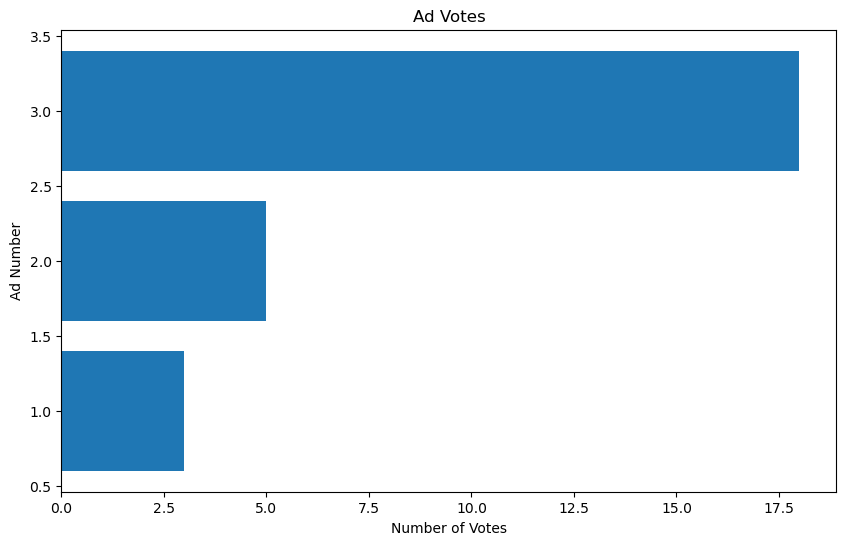

In [20]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [21]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

3